In [ ]:
# @title
# # @title
# # IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# # TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# # THEN FEEL FREE TO DELETE THIS CELL.
# # NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# # ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# # NOTEBOOK.

# import os
# import sys
# from tempfile import NamedTemporaryFile
# from urllib.request import urlopen
# from urllib.parse import unquote, urlparse
# from urllib.error import HTTPError
# from zipfile import ZipFile
# import tarfile
# import shutil

# CHUNK_SIZE = 40960
# DATA_SOURCE_MAPPING = ':https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F9840%2F59638%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240416%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240416T164514Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da47903556e37317773af291afe065b1819f612158c7a5bd01bd63516dad8006d868bb39815abdbdcbf1e6d792c04c02f97e49db96e45e2070e08077d1b83d344c9d8b06a258da8c7bb7340fa1b14ae1660c7d169e0d11372378bbc777ecf21637966e14d21584536713e8fb6ce8dae222a018c097bae3ea7801962234a91b3bdce804f0e357f9dffe1c6d92e429854ec2ea514a81e8d0a4f07ffc998a481939a866c3c7c4e011aa9e0685a9b95c43b624826be877dbce976fe7b0f9e384a56559661029711d352102ab30cfa0750a855eccbacd3c2c036468f4e43df5b916ec87bdca8c628a7775224a26ee71a2449bfe38ce87854036c930ecc9c49902738f2'

# KAGGLE_INPUT_PATH='/kaggle/input'
# KAGGLE_WORKING_PATH='/kaggle/working'
# KAGGLE_SYMLINK='kaggle'

# !umount /kaggle/input/ 2> /dev/null
# shutil.rmtree('/kaggle/input', ignore_errors=True)
# os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
# os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

# try:
#   os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
# except FileExistsError:
#   pass
# try:
#   os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
# except FileExistsError:
#   pass

# for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
#     directory, download_url_encoded = data_source_mapping.split(':')
#     download_url = unquote(download_url_encoded)
#     filename = urlparse(download_url).path
#     destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
#     try:
#         with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
#             total_length = fileres.headers['content-length']
#             print(f'Downloading {directory}, {total_length} bytes compressed')
#             dl = 0
#             data = fileres.read(CHUNK_SIZE)
#             while len(data) > 0:
#                 dl += len(data)
#                 tfile.write(data)
#                 done = int(50 * dl / int(total_length))
#                 sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
#                 sys.stdout.flush()
#                 data = fileres.read(CHUNK_SIZE)
#             if filename.endswith('.zip'):
#               with ZipFile(tfile) as zfile:
#                 zfile.extractall(destination_path)
#             else:
#               with tarfile.open(tfile.name) as tarfile:
#                 tarfile.extractall(destination_path)
#             print(f'\nDownloaded and uncompressed: {directory}')
#     except HTTPError as e:
#         print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
#         continue
#     except OSError as e:
#         print(f'Failed to load {download_url} to path {destination_path}')
#         continue

# print('Data source import complete.')


In [ ]:
# @title
# UPLOAD KAGGLE API KEY BEFORE

#! pip install kaggle
#! mkdir ~/.kaggle
#! cp kaggle.json ~/.kaggle/
#! chmod 600 ~/.kaggle/kaggle.json

#! kaggle competitions download -c costa-rican-household-poverty-prediction
#! unzip costa-rican-household-poverty-prediction.zip -d costa-rican-household-poverty-prediction

#Import packages and datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

pd.options.display.max_columns = 150

# Read in data
train = pd.read_csv('/content/drive/My Drive/Kelly & Yui DS202 Project/train.csv')
test = pd.read_csv('/content/drive/My Drive/Kelly & Yui DS202 Project/test.csv')
train.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    NaN   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       NaN       0      8       0     1       1     0    NaN   
3  ID_d671db89c  180000.0       0      5       0     1       1     1    1.0   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1    1.0   

   r4h1  r4h2  r4h3  r4m1  r4m2  r4m3  r4t1  r4t2  r4t3  tamhog  tamviv  \
0     0     1     1     0     0     0     0     1     1       1       1   
1     0     1     1     0     0     0     0     1     1       1       1   
2     0     0     0     0     1     1     0     1     1       1       1   
3     0     2     2     1     1     2     1     3     4       4       4   
4     0     2     2     1     1     2     1     3     4       4       4   

   escolari  rez_esc  hhsize  paredblolad  paredzocalo  paredpreb  pareddes  \
0        10      NaN       1            1            0          0         0   
1        12      NaN       1            0            0          0         0   
2        11      NaN       1            0            0          0         0   
3         9      1.0       4            1            0          0         0   
4        11      NaN       4            1            0          0         0   

   paredmad  paredzinc  paredfibras  paredother  pisomoscer  pisocemento  \
0         0          0            0           0           1            0   
1         1          0            0           0           0            0   
2         1          0            0           0           1            0   
3         0          0            0           0           1            0   
4         0          0            0           0           1            0   

   pisoother  pisonatur  pisonotiene  pisomadera  techozinc  techoentrepiso  \
0          0          0            0           0          0               1   
1          0          0            0           1          1               0   
2          0          0            0           0          1               0   
3          0          0            0           0          1               0   
4          0          0            0           0          1               0   

   techocane  techootro  cielorazo  abastaguadentro  abastaguafuera  \
0          0          0          1                1               0   
1          0          0          1                1               0   
2          0          0          1                1               0   
3          0          0          1                1               0   
4          0          0          1                1               0   

   abastaguano  public  planpri  noelec  coopele  sanitario1  sanitario2  \
0            0       1        0       0        0           0           1   
1            0       1        0       0        0           0           1   
2            0       1        0       0        0           0           1   
3            0       1        0       0        0           0           1   
4            0       1        0       0        0           0           1   

   sanitario3  sanitario5  sanitario6  energcocinar1  energcocinar2  \
0           0           0           0              0              0   
1           0           0           0              0              1   
2           0           0           0              0              1   
3           0           0           0              0              1   
4           0           0           0              0              1   

   energcocinar3  energcocinar4  elimbasu1  elimbasu2  elimbasu3  elimbasu4  \
0              1              0          1          0          0          0   
1              0              0          1          0          0          0   
2              0              0          1          0          0          0   
3              0              0          1          0

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


Training dataset has 130 integer columns, 8 float columns, and 5 object columns, total of 143 columns including the `Target` column. \
Test dataset has 129 integer columns (Target excluded), 8 float columns, and 5 object columns. Test dataset does not include Target, and the performance of the model is assessed and estimated using 10 fold cross validation on training set.


#Comprehensive EDA

In this notebook, we have extracted the parts where we thought as important in assessing the ADS developed by this solution. We included parts where it directly relates to the motivations behind data preprocessing done by author, and some important findings on the dataset in terms of demographics.

### Float columns distributions

This part focuses on examining the distribution of each float type features in the training dataset. The author uses Kernel Density Estimates to show the distribution of each variable.\
Below is the list of detailed descriptions for each float variables:

1. `v2a1` = monthly rent payment
2. `v18q1` = number of tablets household owns
3. `rez_esc` = years behind in school
4. `meaneduc` = average years of education for adults (18+)
5. `overcrowding` = number of persons per room
6. `sqbovercrowding` = `overcrowding` squared
7. `sqbdependency` = `dependency` squared
8. `sqbmeaned` = `meaneduc` squared

By looking at the plot generated, we could see that a hgiher average adult education leads to higher values of the target (less severe levels of poverty). We can also see that higher monthly rent is indicating slightly that the household is more likely to belong to less vulnerable household.\
We can also see that non vulnerable households are less likely to overcrowd (less density for higher values for overcrowding), and vulnerable households are slightly more likely to have higher dependency rate.

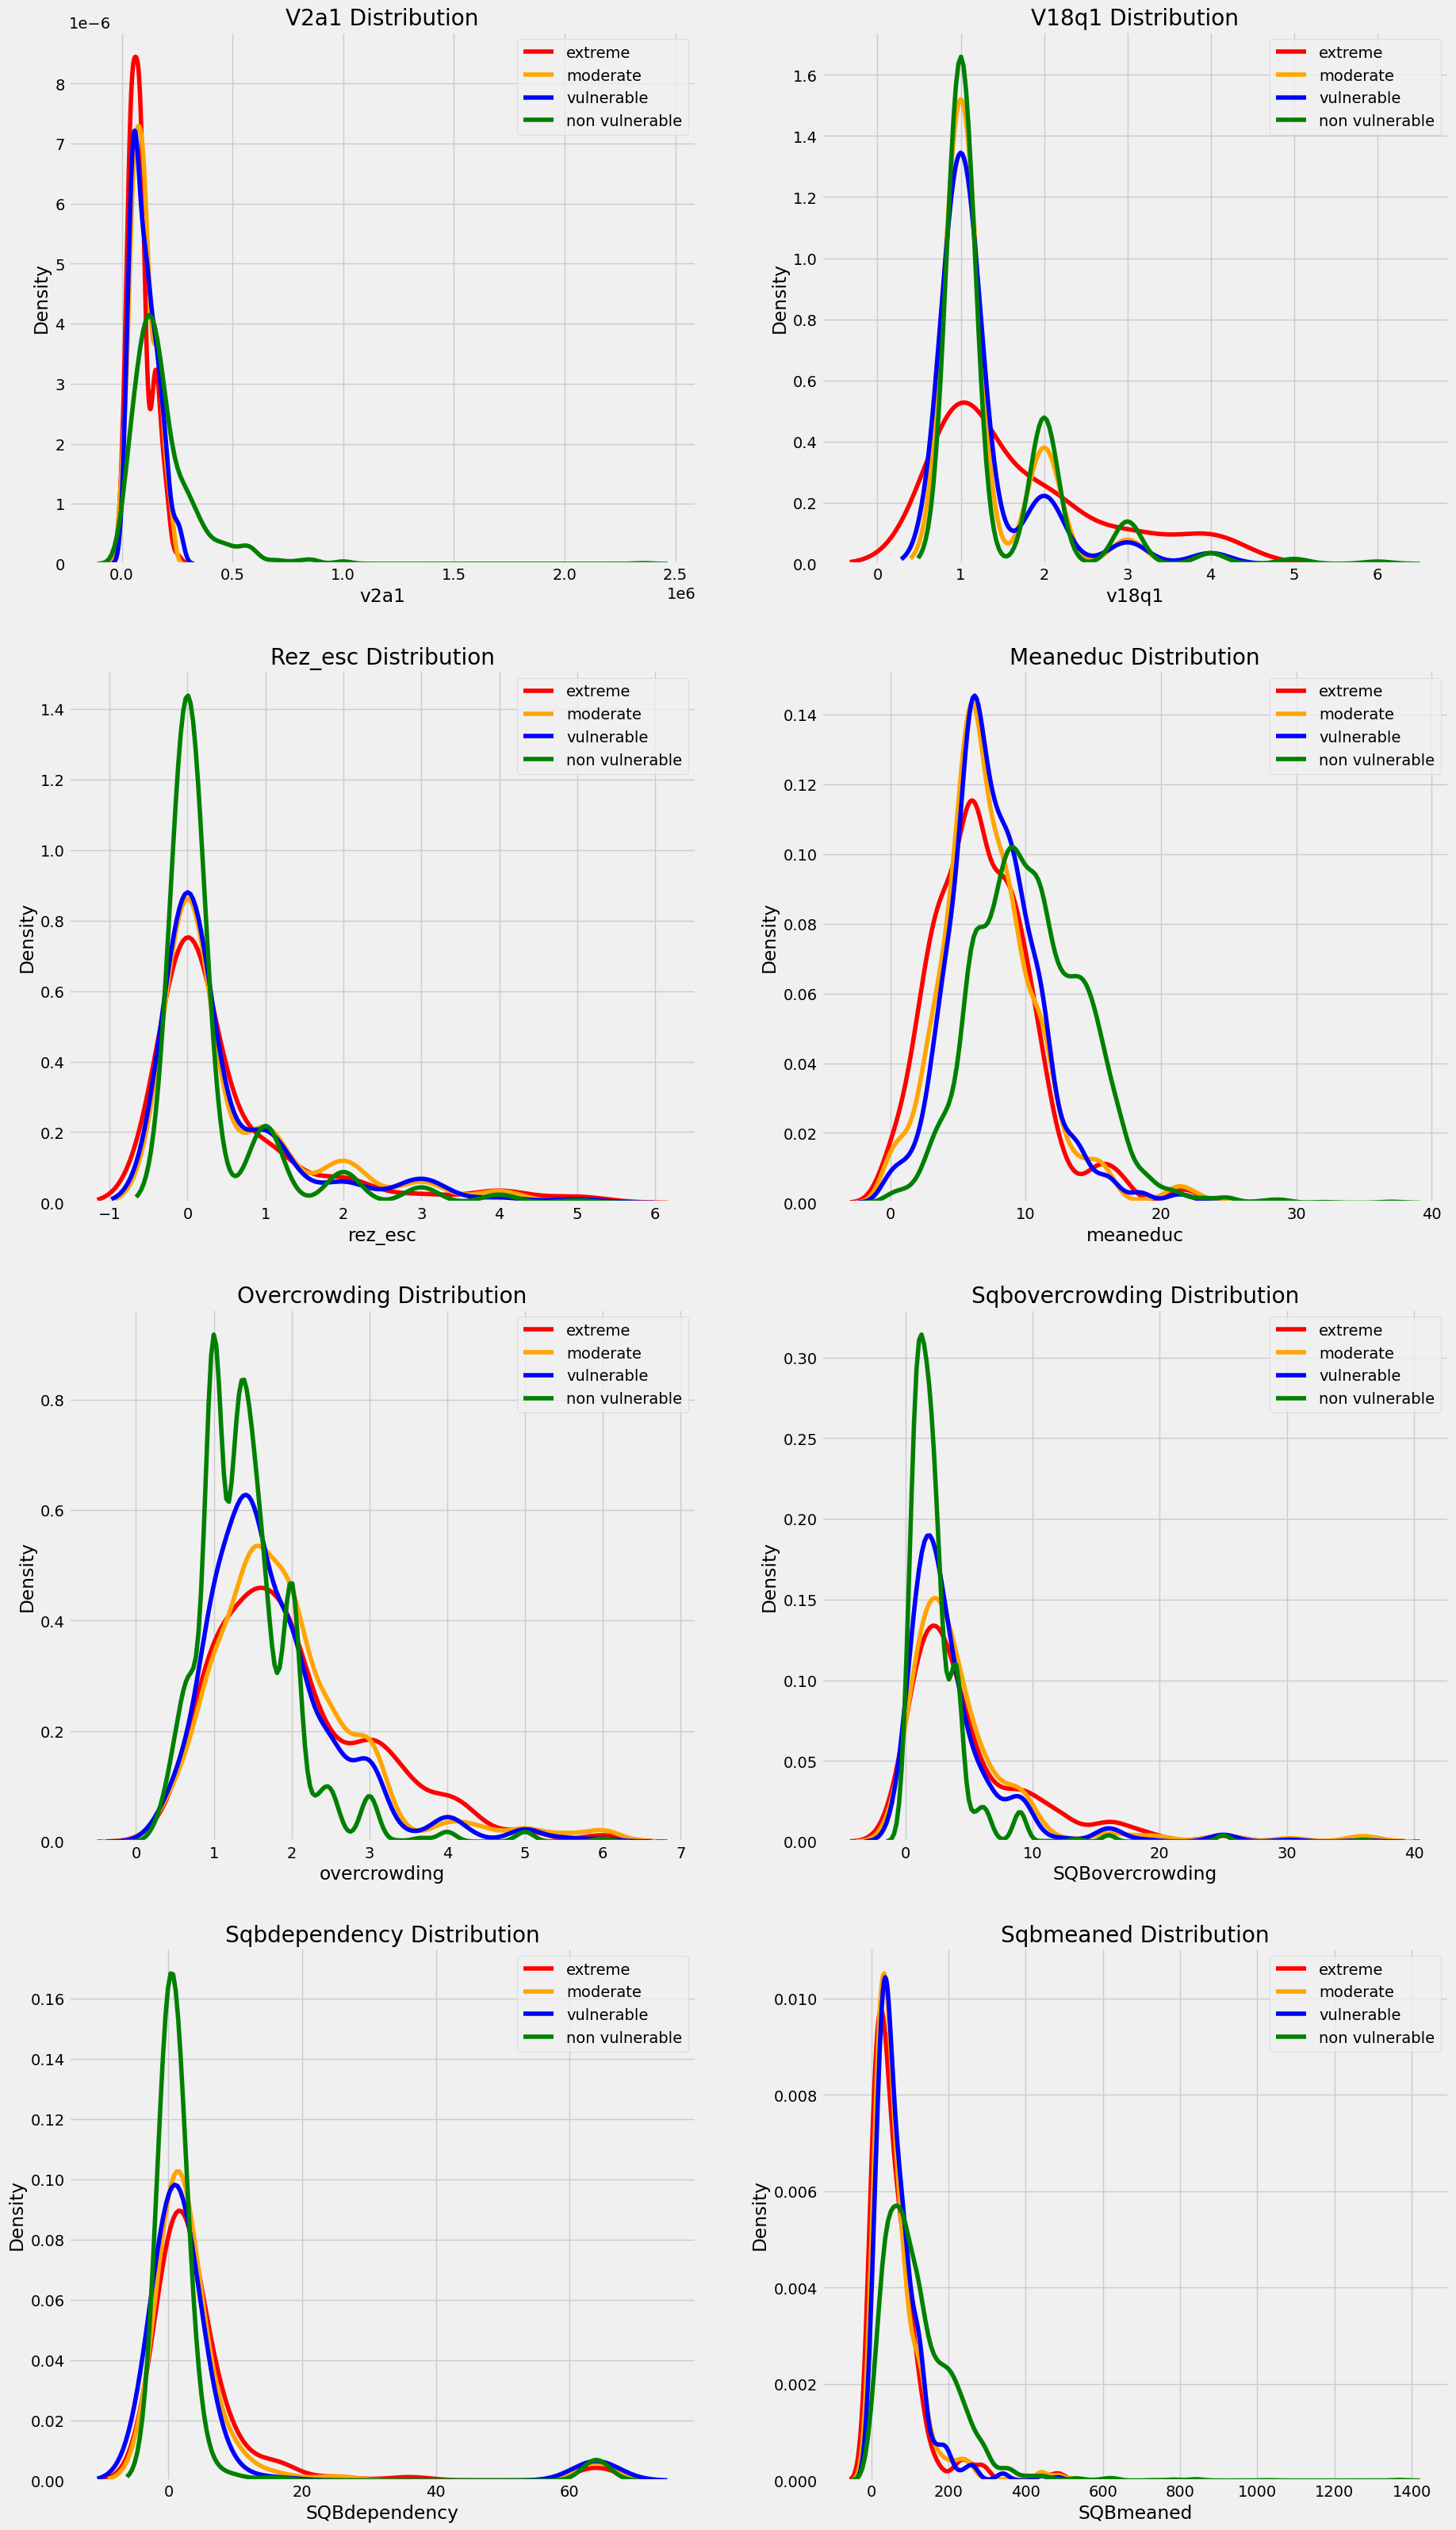

In [ ]:
from collections import OrderedDict

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

# Color mapping
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# Iterate through the float columns
for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(),
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
    plt.legend()
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

### Object column distributions

Object variables include the following:

1. `Id` = unique identifier for each row (individual)
2. `idhogar` = unique identifier for each household (household)
3. `dependency` = dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
4. `edjefe`: years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
5. `edjefa`: years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

In [ ]:
train.select_dtypes('object').head()

Id    idhogar dependency edjefe edjefa
0  ID_279628684  21eb7fcc1         no     10     no
1  ID_f29eb3ddd  0e5d7a658          8     12     no
2  ID_68de51c94  2c7317ea8          8     no     11
3  ID_d671db89c  2b58d945f        yes     11     no
4  ID_d56d6f5f5  2b58d945f        yes     11     no

By looking at the object columns, we can see that `dependency`, `edjefe` and `edjefa` has mix of strings and numbers. The author correct the variables using mapping and convert the strings into floats accordingly.

In [ ]:
mapping = {"yes": 1, "no": 0}

# Apply same operation to both train and test
for df in [train, test]:
    # Fill in the values with the correct mapping
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)

train[['dependency', 'edjefa', 'edjefe']].describe()

dependency       edjefa       edjefe
count  9557.000000  9557.000000  9557.000000
mean      1.149550     2.896830     5.096788
std       1.605993     4.612056     5.246513
min       0.000000     0.000000     0.000000
25%       0.333333     0.000000     0.000000
50%       0.666667     0.000000     6.000000
75%       1.333333     6.000000     9.000000
max       8.000000    21.000000    21.000000

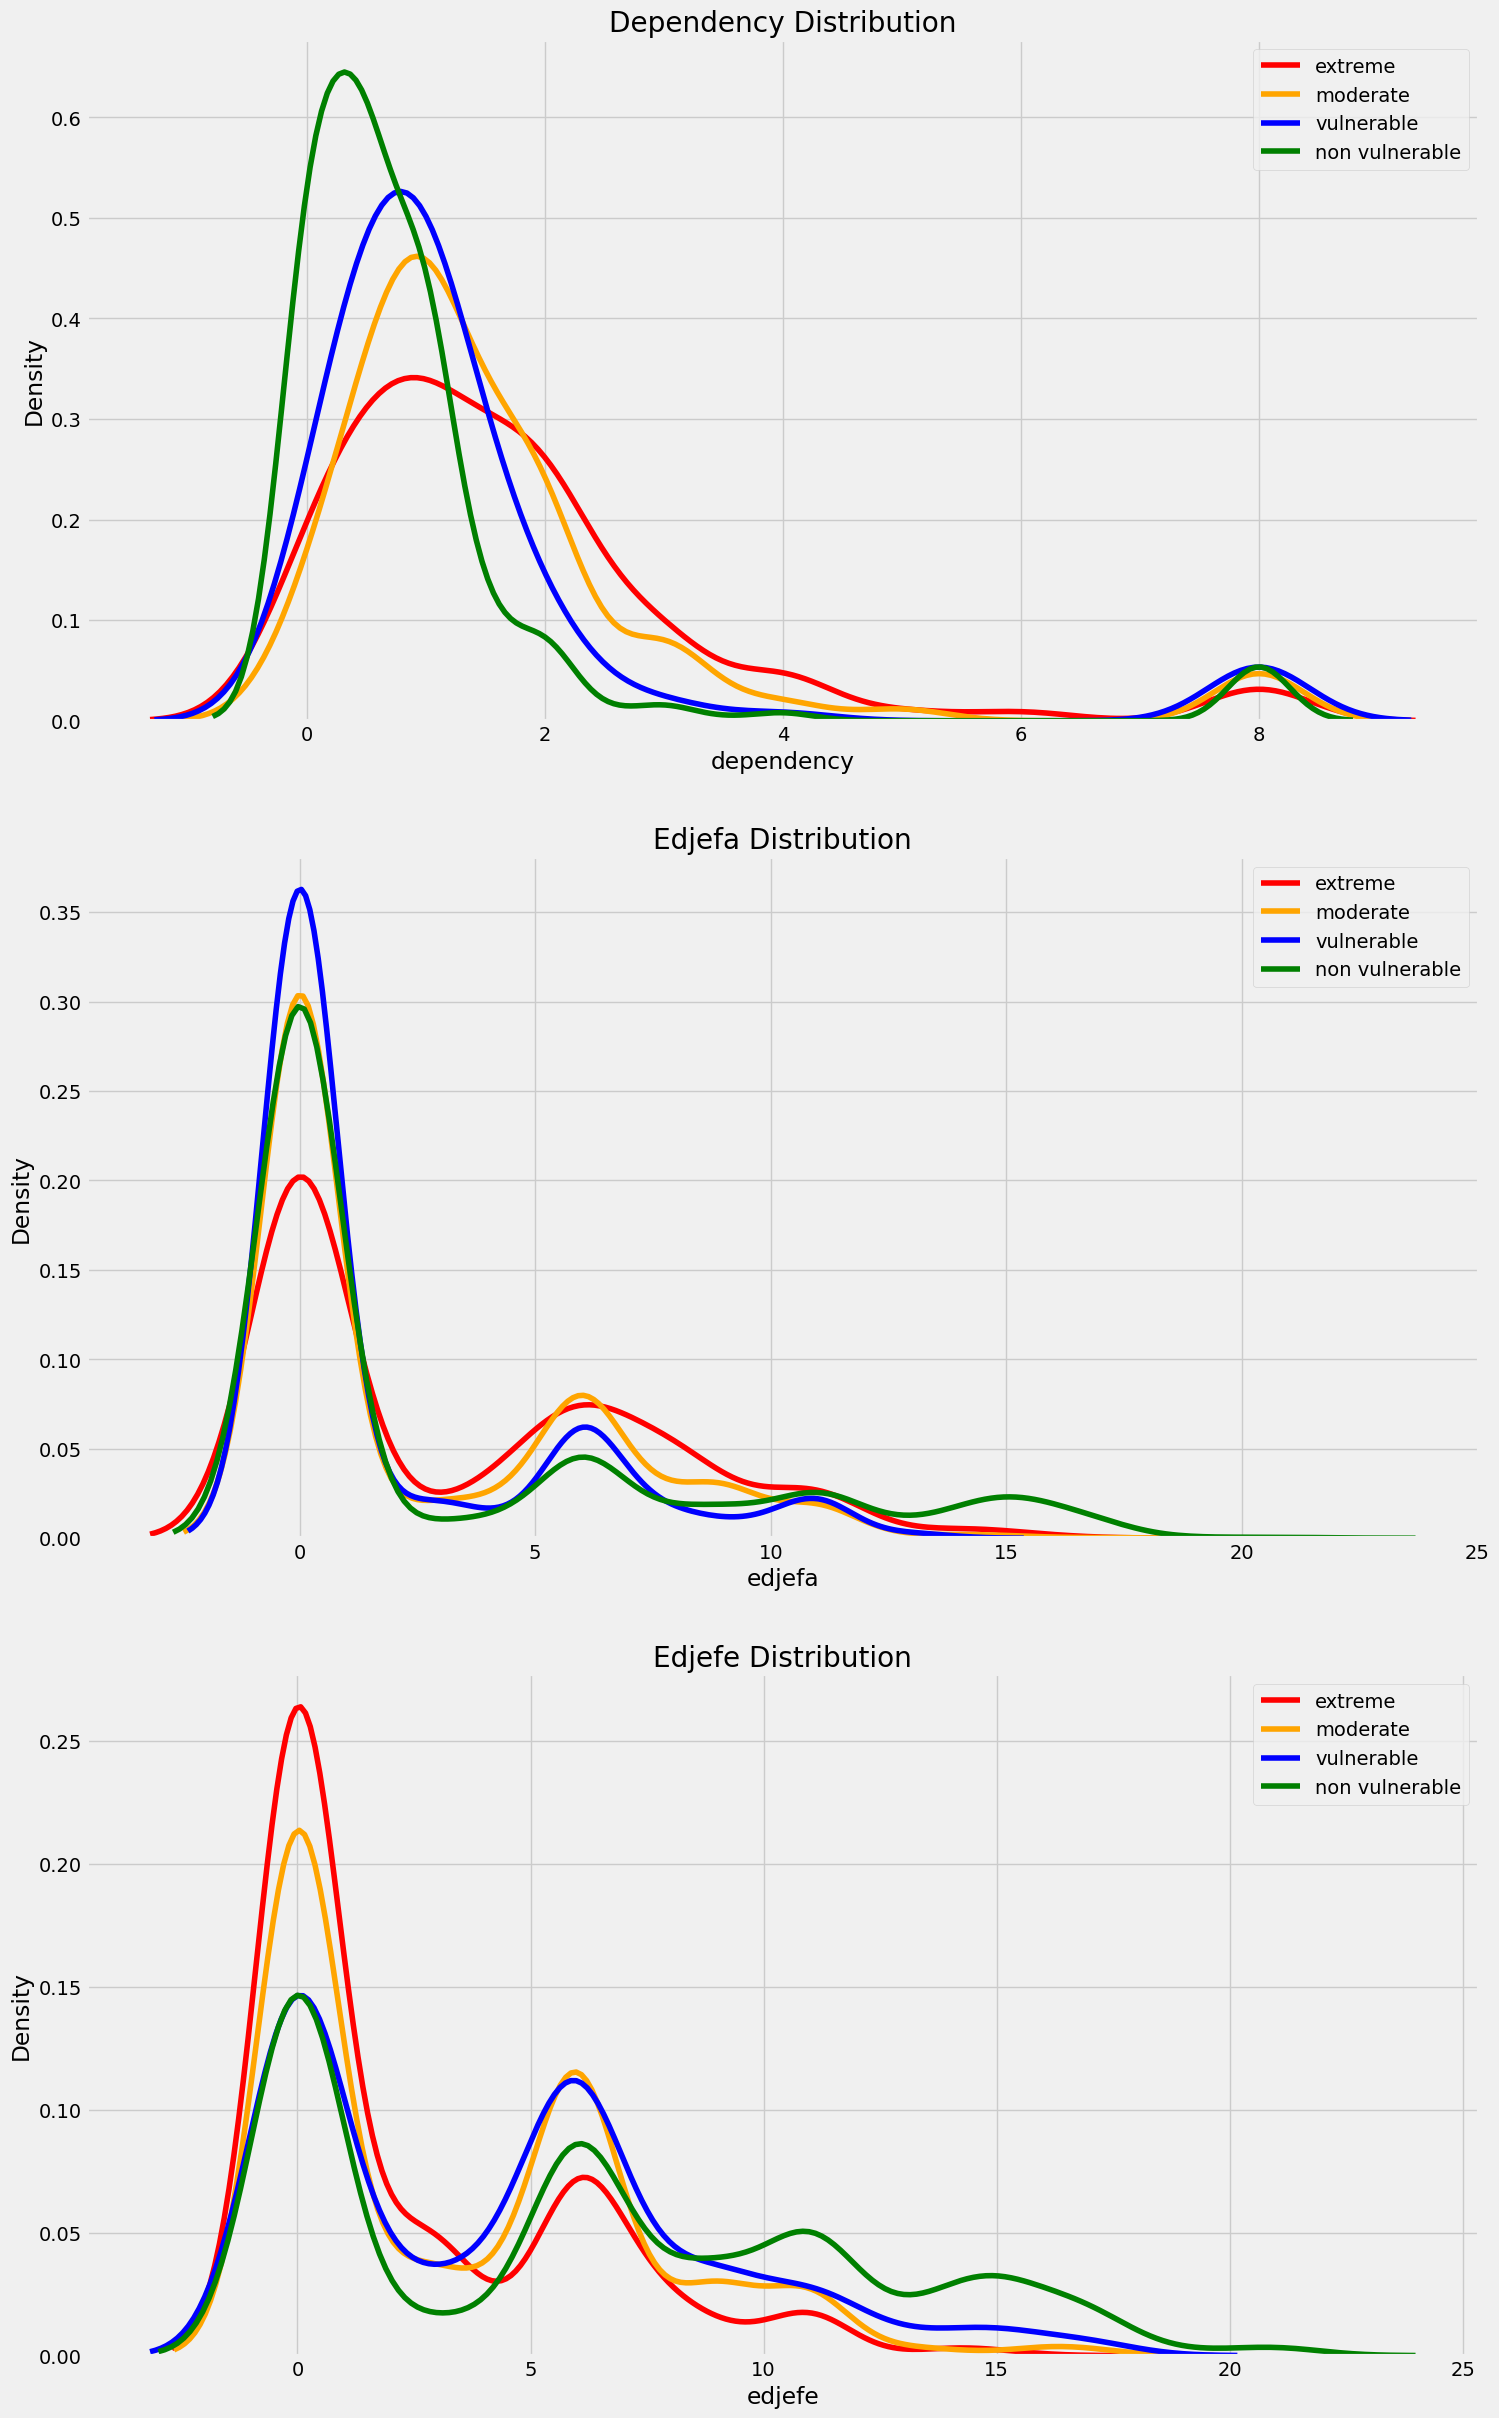

In [ ]:
plt.figure(figsize = (16, 12))

# Iterate through the float columns
for i, col in enumerate(['dependency', 'edjefa', 'edjefe']):
    ax = plt.subplot(3, 1, i + 1)
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(),
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
    plt.legend()
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

By looking at the density distribution, we could see that non vulnerable households have less dependency. We can also see for `edjefe`, years of education of **male** head of household, extreme households have more male heads with 0 years of education, and non vulnerable households have least numbers of male heads with 0 years of education.\
In contrast, we can see that for `edjefa`, years of education of **female** head of household, less female heads have 0 years of education, and the vulnerable households (households below poverty level 4) are more likely to have female heads with no education.\
However, for education years between 5-10, **male** heads for vulnerable and moderate households are more likely to belong to this range, whereas it is more likely for extreme and moderate households for **female** heads. The **education** of household heads, as well as mean education level of the household, will be a point of focus for our analysis later.

### Label distribution (poverty level distribution)

**important: the author has appended the test dataset into train dataset.**

In [ ]:
# Add null Target column to test
test['Target'] = np.nan
data = train._append(test, ignore_index = True)

Target
1.0     222
2.0     442
3.0     355
4.0    1954
Name: count, dtype: int64

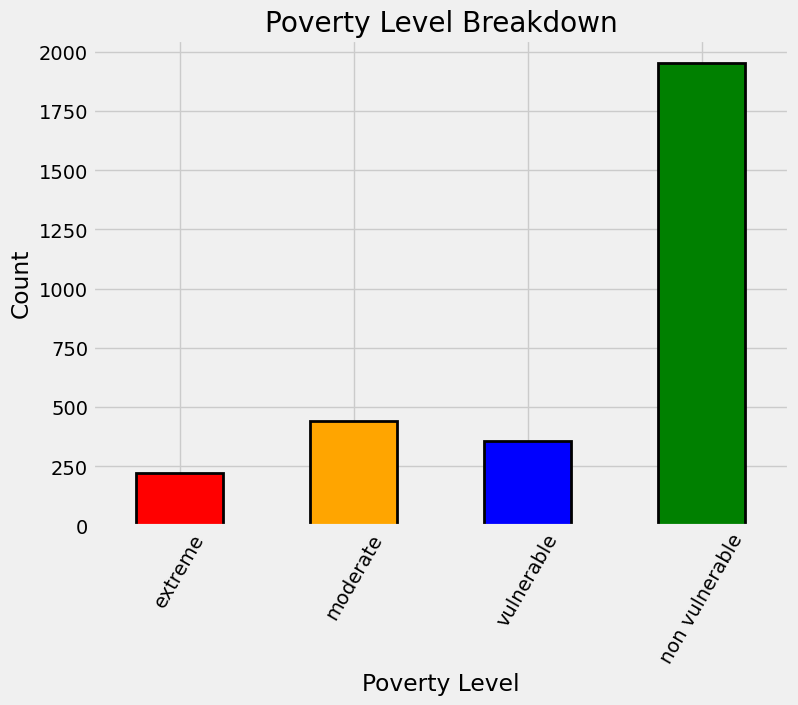

In [ ]:

# Heads of household
heads = data.loc[data['parentesco1'] == 1].copy()

# Labels for training
train_labels = data.loc[(data['Target'].notnull()) & (data['parentesco1'] == 1), ['Target', 'idhogar']]

# Value counts of target
label_counts = train_labels['Target'].value_counts().sort_index()

# Bar plot of occurrences of each label
label_counts.plot.bar(figsize = (8, 6),
                      color = colors.values(),
                      edgecolor = 'k', linewidth = 2)

# Formatting
plt.xlabel('Poverty Level'); plt.ylabel('Count');
plt.xticks([x - 1 for x in poverty_mapping.keys()],
           list(poverty_mapping.values()), rotation = 60)
plt.title('Poverty Level Breakdown');

label_counts

The dataset has a highly imbalanced distribution among 4 different levels of poverty. There are much more households that belong to "non vulnerable" category compared to the other 3 classes of poverty. The competition and the author addresses this issue by using macro F1 score, the average of F1 score for each class- **without taking into account label imbalances.** This decision was made by the organizers.



$$F_1 = \frac{2}{\tfrac{1}{\mathrm{recall}} + \tfrac{1}{\mathrm{precision}}} = 2 \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{\mathrm{precision} + \mathrm{recall}}$$




$$\text{Macro F1} = \frac{\text{F1 Class 1} + \text{F1 Class 2} + \text{F1 Class 3} + \text{F1 Class 4}}{4}$$

#Preprocess 1: wrong labels between household level and individual level

Some labels in competition's training dataset has mismatching values for `Target` between individual level and household levels. There are also households without an indicated head of household (`parentesco1` == 0 for all individuals in the same household). For households without a head, there is no wrong labels, but these households will not be used in the model development process, as the competition is only focusing on prediction of poverty level **on a household level**.\
The author correct the wrong labels accordingly, and drops rows where  `parentsco1` == 0  and belongs to the same household.\
For out analysis later, we may take a deeper look into these households without a head, and look at their gender, education levels, and poverty levels. For now we will follow the original solution's procedure.

In [ ]:
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


In [ ]:
train

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  \
0     ID_279628684  190000.0       0      3       0     1       1     0   
1     ID_f29eb3ddd  135000.0       0      4       0     1       1     1   
2     ID_68de51c94       NaN       0      8       0     1       1     0   
3     ID_d671db89c  180000.0       0      5       0     1       1     1   
4     ID_d56d6f5f5  180000.0       0      5       0     1       1     1   
...            ...       ...     ...    ...     ...   ...     ...   ...   
9552  ID_d45ae367d   80000.0       0      6       0     1       1     0   
9553  ID_c94744e07   80000.0       0      6       0     1       1     0   
9554  ID_85fc658f8   80000.0       0      6       0     1       1     0   
9555  ID_ced540c61   80000.0       0      6       0     1       1     0   
9556  ID_a38c64491   80000.0       0      6       0     1       1     0   

      v18q1  r4h1  r4h2  r4h3  r4m1  r4m2  r4m3  r4t1  r4t2  r4t3  tamhog  \
0       NaN     0     1     1     0     0     0     0     1     1       1   
1       1.0     0     1     1     0     0     0     0     1     1       1   
2       NaN     0     0     0     0     1     1     0     1     1       1   
3       1.0     0     2     2     1     1     2     1     3     4       4   
4       1.0     0     2     2     1     1     2     1     3     4       4   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...     ...   
9552    NaN     0     2     2     1     2     3     1     4     5       5   
9553    NaN     0     2     2     1     2     3     1     4     5       5   
9554    NaN     0     2     2     1     2     3     1     4     5       5   
9555    NaN     0     2     2     1     2     3     1     4     5       5   
9556    NaN     0     2     2     1     2     3     1     4     5       5   

      tamviv  escolari  rez_esc  hhsize  paredblolad  paredzocalo  paredpreb  \
0          1        10      NaN       1            1            0          0   
1          1        12      NaN       1            0            0          0   
2          1        11      NaN       1            0            0          0   
3          4         9      1.0       4            1            0          0   
4          4        11      NaN       4            1            0          0   
...      ...       ...      ...     ...          ...          ...        ...   
9552       5         9      NaN       5            1            0          0   
9553       5         0      NaN       5            1            0          0   
9554       5         5      NaN       5            1            0          0   
9555       5        11      NaN       5            1            0          0   
9556       5         8      NaN       5            1            0          0   

      pareddes  paredmad  paredzinc  paredfibras  paredother  pisomoscer  \
0            0         0          0            0           0           1   
1            0         1          0            0           0           0   
2            0         1          0            0           0           1   
3            0         0          0            0           0           1   
4            0         0          0            0           0           1   
...        ...       ...        ...          ...         ...         ...   
9552         0         0          0            0           0           0   
9553         0         0          0            0           0           0   
9554         0         0          0            0           0           0   
9555         0         0          0            0           0           0   
9556         0         0          0            0           0           0   

      pisocemento  pisoother  pisonatur  pisonotiene  pisomadera  techozinc  \
0               0          0          0            0           0          0   
1               0          0          0            0           1          1   
2               0          0          0            0           0          1   


Correcting errors:

In [ ]:
for household in not_equal.index:
    # Find the correct label (for the head of household)
    true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])

    # Set the correct label for all members in the household
    train.loc[train['idhogar'] == household, 'Target'] = true_target


# Groupby the household and figure out the number of unique values
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

<ipython-input-15-9601565b4351>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])


There are 0 households where the family members do not all have the same target.


#Preprocess 2: Missing Variables

##1. Missing values for each column

For Target, the author made NaN for test dataset, therefore it is included in calculating the missing values.\
`rez_esc`, `v18q1`, and `v2a1` have 70 - 80% values missing.\
For the following parts, we have excluded the plot for missing values. The detailed plots for missing values' distributions and value counts could be found in the original notebook of the solution.

In [ ]:
# Number of missing in each column
missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
missing['percent'] = missing['total'] / len(data)

missing.sort_values('percent', ascending = False).head(10).drop('Target')

total   percent
rez_esc       27581  0.825457
v18q1         25468  0.762218
v2a1          24263  0.726154
SQBmeaned        36  0.001077
meaneduc         36  0.001077
hogar_adul        0  0.000000
parentesco10      0  0.000000
parentesco11      0  0.000000
parentesco12      0  0.000000

The author imputes the missing variables according to the following logistics:

1. `v18q1`(number of tablets household owns): the author first looks at `v18q`, which indicates whether or not a family owns a tablet. Then he realizes that for all missing values in `v18q``, the household does not own a tablet (`v18q` == 0). Therefore he imputes the missing variables with 0.

2. `v2a1`(monthly rent payment): the author indicates that households that do not have a monthly rent payment generally own their own home. However, he does point out that "for other situations, we are not sure of the reason for the missing information." He imputes the missing values with 0 for those who owns a home, and creates a flag column (boolean) `v2a1-missing` to indicate that these households have missing values. We can see that **even after imputation, there are significant numbers of households with missing values for rent payment.**

3. `rez_esc` (years behind in school): this variable is only defined for individuals between 7 and 19. He imputes 0 to individuals younger or older than this age range, and creates a boolean flag column `rez_esc-missing` for other cases.

In [ ]:
# v18q1: fill in with 0
data['v18q1'] = data['v18q1'].fillna(0)

In [ ]:
# v2a1
own_variables = [x for x in data if x.startswith('tipo')]

# Fill in households that own the house with 0 rent payment
data.loc[(data['tipovivi1'] == 1), 'v2a1'] = 0

# Create missing rent payment column
data['v2a1-missing'] = data['v2a1'].isnull()

data['v2a1-missing'].value_counts()

v2a1-missing
False    29994
True      3419
Name: count, dtype: int64

In [ ]:
# rez_esc

# If individual is over 19 or younger than 7 and missing years behind, set it to 0
data.loc[((data['age'] > 19) | (data['age'] < 7)) & (data['rez_esc'].isnull()), 'rez_esc'] = 0

# Add a flag for those between 7 and 19 with a missing value
data['rez_esc-missing'] = data['rez_esc'].isnull()

For the remaining missing variables, the author plots the distribution of poverty levels for these households and finds out that not vulnerable (`Target` == 4) households accounts for most of the years behind education (rez_esc), and moderate poverty (`Target` == 2 ) has the highest count for missing monthly rent payment(v2a1).

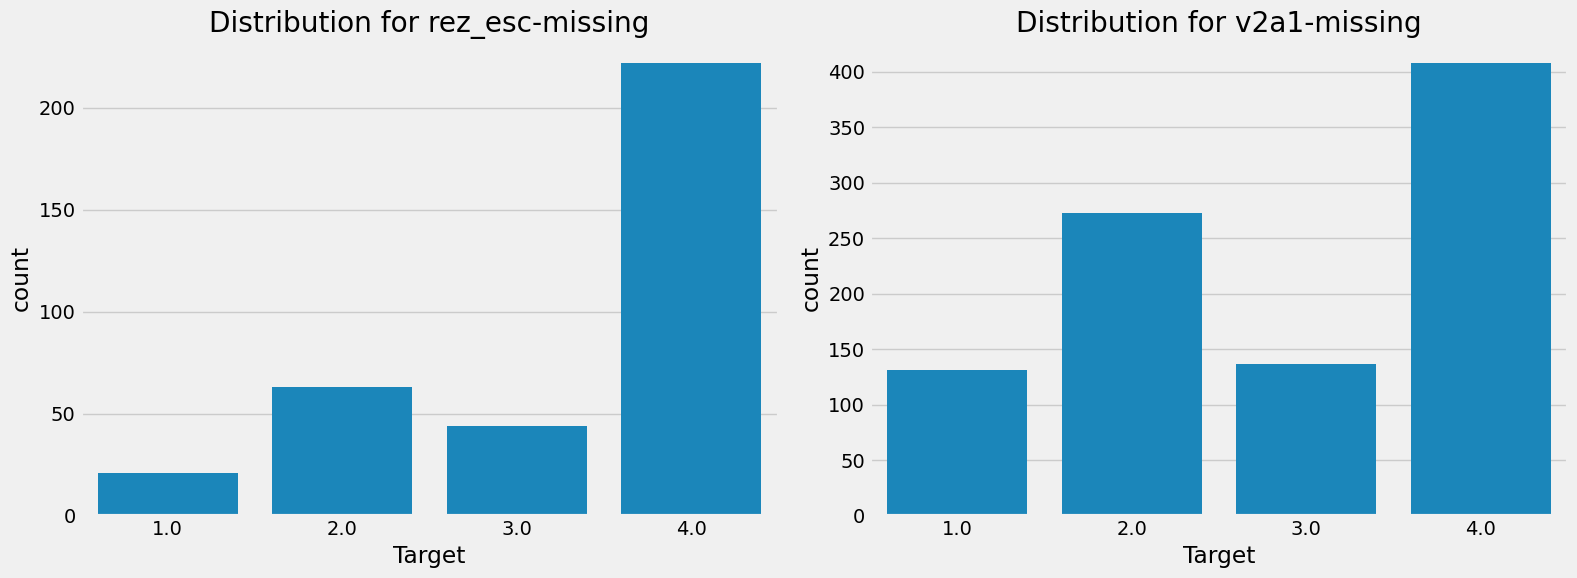

In [ ]:
# modified plots viualization for clarity

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x='Target', data=data[data['rez_esc-missing'] == 1], ax=axes[0])
axes[0].set_title('Distribution for rez_esc-missing')

sns.countplot(x='Target', data=data[data['v2a1-missing'] == 1], ax=axes[1])
axes[1].set_title('Distribution for v2a1-missing')

plt.tight_layout()
plt.show()

# Preprocess 3: Feature Engineering

Since the competition is concerned with prediction of poverty level on a household level, the author aggregates the individual level features into household levels, using `groupby` and `agg` functions.

## Column Definition

In [ ]:
# unique identifiers

id_ = ['Id', 'idhogar', 'Target']

# individual binary variables (0 or 1)
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3',
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7',
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5',
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10',
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3',
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8',
            'instlevel9', 'mobilephone', 'rez_esc-missing']

# individual ordinal variables
ind_ordered = ['rez_esc', 'escolari', 'age']


# household binary variables (0 or 1)
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo',
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother',
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo',
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1',
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4',
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4',
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3',
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5',
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']

# household ordinal variables
hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2',
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

# household continuous variables
hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

# squared variables
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

The author removes all the squared variables, since they are highly correlated with the non-squared version of the variables. The squared variables helps for linear models but hurts more complex models, and the non-squared versions are sufficient for model development.

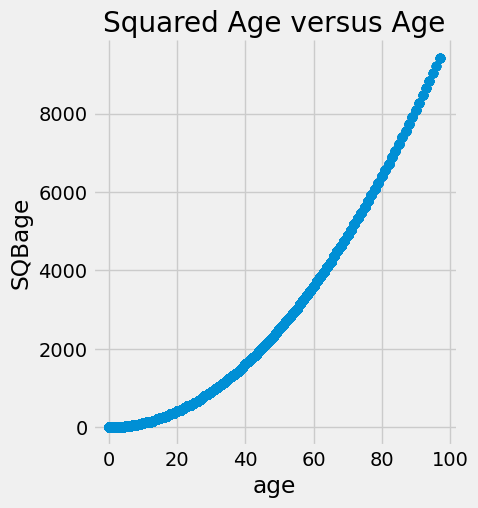

In [ ]:
sns.lmplot(x='age', y='SQBage', data=data, fit_reg=False)
plt.title('Squared Age versus Age')
plt.show()

In [ ]:
data = data.drop(columns = sqr_)
data.shape

(33413, 136)

## Household level feature engineering & aggregation

The author keeps `Id` as it is. He then subset to the head of household and to the household level variables, since we are predicting on household levels.\
By looking at correlation matrix between household variables, he removes redundant variables that are too highly correlated, setting 0.95 as the threshold.

Household size variables:

1. `r4t3`, Total persons in the household
2. `tamhog`, size of the household
3. `tamviv`, number of persons living in the household
4. `hhsize`, household size
5. `hogar_total`, # of total individuals in the household

The author removes tamhog, hogar_total, r4t3 which indicate size of the house, as they are highly correlated with each other and redundant. He also removes `area2` which indicates that the house is in a rural zone, as the variable is redundant with another variable indicating if the house is in a urban zone.

In [ ]:
heads = data.loc[data['parentesco1'] == 1, :]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
heads.shape

(10307, 99)

In [ ]:
heads

Id    idhogar  Target  hacdor  hacapo  v14a  refrig  \
0      ID_279628684  21eb7fcc1     4.0       0       0     1       1   
1      ID_f29eb3ddd  0e5d7a658     4.0       0       0     1       1   
2      ID_68de51c94  2c7317ea8     4.0       0       0     1       1   
5      ID_ec05b1a7b  2b58d945f     4.0       0       0     1       1   
8      ID_1284f8aad  d6dae86b7     4.0       1       0     1       1   
...             ...        ...     ...     ...     ...   ...     ...   
33393  ID_265b917e8  e44cb9969     NaN       0       0     0       0   
33398  ID_19c0b1480  935a65ffa     NaN       0       0     1       1   
33400  ID_aa256c594  2edb6f51e     NaN       0       0     1       1   
33404  ID_4b7feead3  3aa78c56b     NaN       1       1     1       1   
33409  ID_1a7c6953b  d237404b6     NaN       0       0     1       1   

       paredblolad  paredzocalo  paredpreb  pisocemento  pareddes  paredmad  \
0                1            0          0            0         0         0   
1                0            0          0            0         0         1   
2                0            0          0            0         0         1   
5                1            0          0            0         0         0   
8                1            0          0            0         0         0   
...            ...          ...        ...          ...       ...       ...   
33393            0            0          0            0         0         1   
33398            0            0          0            1         0         1   
33400            0            0          0            1         0         1   
33404            0            0          0            1         0         1   
33409            0            0          1            1         0         0   

       paredzinc  paredfibras  paredother  pisomoscer  pisoother  pisonatur  \
0              0            0           0           1          0          0   
1              0            0           0           0          0          0   
2              0            0           0           1          0          0   
5              0            0           0           1          0          0   
8              0            0           0           1          0          0   
...          ...          ...         ...         ...        ...        ...   
33393          0            0           0           0          0          0   
33398          0            0           0           0          0          0   
33400          0            0           0           0          0          0   
33404          0            0           0           0          0          0   
33409          0            0           0           0          0          0   

       pisonotiene  pisomadera  techozinc  techoentrepiso  techocane  \
0                0           0          0               1          0   
1                0           1          1               0          0   
2                0           0          1               0          0   
5                0           0          1               0          0   
8                0           0          1               0          0   
...            ...         ...        ...             ...        ...   
33393            0           1          1               0          0   
33398            0           0          1               0          0   
33400            0           0          1               0          0   
33404            0           0          1               0          0   
33409            0           0          1               0          0   

       techootro  cielorazo  abastaguadentro  abastaguafuera  abastaguano  \
0              0          1                1               0            0   
1              0          1                1               0            0   
2              0          1                1               0            0   
5              0          1                1               0            0   
8   

In [ ]:
# @title
## Create correlation matrix
# corr_matrix = heads.corr()

## Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

## Find index of feature columns with correlation greater than 0.95
# to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

#to_drop

In [ ]:
# modified due to error; output of variables dropped match

# Identify non-numeric columns
non_numeric_columns = heads.select_dtypes(exclude=[np.number]).columns

# Optionally print non-numeric columns to check
print("Non-numeric columns:", non_numeric_columns)

# Drop non-numeric columns
heads_numeric = heads.drop(columns=non_numeric_columns)

# Create correlation matrix
corr_matrix = heads_numeric.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

# Print columns to drop
print("Columns to drop due to high correlation:", to_drop)

Non-numeric columns: Index(['Id', 'idhogar', 'v2a1-missing'], dtype='object')
Columns to drop due to high correlation: ['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']


<Axes: >

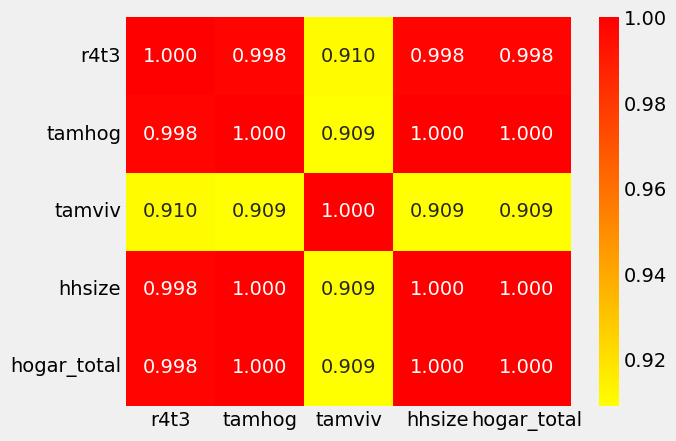

In [ ]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True, cmap = plt.cm.autumn_r, fmt='.3f')

In [ ]:
heads = heads.drop(columns = ['tamhog', 'hogar_total', 'r4t3'])

In [ ]:
heads = heads.drop(columns = 'area2')

heads.groupby('area1')['Target'].value_counts(normalize = True)

area1  Target
0      4.0       0.582249
       2.0       0.176331
       3.0       0.147929
       1.0       0.093491
1      4.0       0.687030
       2.0       0.137688
       3.0       0.108083
       1.0       0.067199
Name: proportion, dtype: float64

The author creates a new variable that measures the difference between number of people living in the household and the actual size of the household- `hhsize-diff`, as he realizes that the numbers mismatch in some cases.

In [ ]:
heads['hhsize-diff'] = heads['tamviv'] - heads['hhsize']

## Electricity, walls & floors conditions

For the construction conditions of the household, the author turn them into ordinal variables because there is an inherent order: `bad < regular < good`, using np.argmax, and drops the original redundant variables. He then creates a new feature called `walls+roof+floor` that add up the three features to get and overall measure of the quality of the house's structure.


In [ ]:
elec = []

# Assign values
for i, row in heads.iterrows():
    if row['noelec'] == 1:
        elec.append(0)
    elif row['coopele'] == 1:
        elec.append(1)
    elif row['public'] == 1:
        elec.append(2)
    elif row['planpri'] == 1:
        elec.append(3)
    else:
        elec.append(np.nan)

# Record the new variable and missing flag
heads['elec'] = elec
heads['elec-missing'] = heads['elec'].isnull()

# Remove the electricity columns
# heads = heads.drop(columns = ['noelec', 'coopele', 'public', 'planpri'])

In [ ]:
# Wall ordinal variable
heads['walls'] = np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]),
                           axis = 1)

# Roof ordinal variable
heads['roof'] = np.argmax(np.array(heads[['etecho1', 'etecho2', 'etecho3']]),
                           axis = 1)
heads = heads.drop(columns = ['etecho1', 'etecho2', 'etecho3'])

# Floor ordinal variable
heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]),
                           axis = 1)

#heads = heads.drop(columns = ['eviv1', 'eviv2', 'eviv3'])

In [ ]:
# Create new feature
heads['walls+roof+floor'] = heads['walls'] + heads['roof'] + heads['floor']

## Warnings about quality of the house + Bonus feature

In [ ]:
# It will be a negative value, with -1 point each for no toilet, electricity, floor, water service, and ceiling.

# No toilet, no electricity, no floor, no water service, no ceiling
heads['warning'] = 1 * (heads['sanitario1'] +
                         (heads['elec'] == 0) +
                         heads['pisonotiene'] +
                         heads['abastaguano'] +
                         (heads['cielorazo'] == 0))


In [ ]:
# bonus where a family gets a point for having a refrigerator, computer, tablet, or television.

heads['bonus'] = 1 * (heads['refrig'] +
                      heads['computer'] +
                      (heads['v18q1'] > 0) +
                      heads['television'])

## Per capita features: number of certain measurements for each person in the household

In [ ]:
heads['phones-per-capita'] = heads['qmobilephone'] / heads['tamviv']
heads['tablets-per-capita'] = heads['v18q1'] / heads['tamviv']
heads['rooms-per-capita'] = heads['rooms'] / heads['tamviv']
heads['rent-per-capita'] = heads['v2a1'] / heads['tamviv']

In [ ]:
heads.shape

(10307, 105)

## Individual variables feature engineering & aggregations

The process follows similarly with the feature engineering done for household variables:

1. removes redundant individual variables
2. creates ordinal variables
3. feature construction
4. feature engineering through aggregations


The author removes `male` since there is already a feature `female` to avoid redundancy.\
For feature aggregation, the author uses `groupby` the family id `idhogar` and then `agg` the data. Then he drops redundant columns.\
Then he removes one out of every pair of variables with correlation greater than 0.95.

In [ ]:
ind = data[id_ + ind_bool + ind_ordered]
ind.shape

(33413, 40)

In [ ]:
# Select only numeric columns for correlation calculation
numeric_data = ind.select_dtypes(include=[np.number])

# Create correlation matrix
corr_matrix = numeric_data.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

print(to_drop)

['female']


In [ ]:
ind = ind.drop(columns = 'male')

In [ ]:
# creating ordinal variables

# instlevel_: amount of education an individual has from 1 to 9
ind['inst'] = np.argmax(np.array(ind[[c for c in ind if c.startswith('instl')]]), axis = 1)

In [ ]:
# feature construction

# escolari/age: divide years of schooling by age
ind['escolari/age'] = ind['escolari'] / ind['age']

# inst/age
ind['inst/age'] = ind['inst'] / ind['age']

# tech: combination of tablet and mobile phones
ind['tech'] = ind['v18q'] + ind['mobilephone']

In [ ]:
# feature engineering through aggregations

# Define custom function for range
def range_(x):
    return x.max() - x.min()
range_.__name__ = 'range_'

# Ensure 'idhogar' is retained for grouping, exclude 'Target', and focus only on numeric data
columns_to_use = [col for col in ind.columns if col != 'Target' and ind[col].dtype in [np.float64, np.int64]]
if 'idhogar' not in columns_to_use:
    columns_to_use.append('idhogar')

# Select the relevant columns
ind_numeric = ind[columns_to_use]

# Group by 'idhogar' and perform aggregation on numeric columns
# Exclude 'idhogar' from the columns to apply numeric operations
agg_operations = {col: ['min', 'max', 'sum', 'count', 'std', range_] for col in ind_numeric.columns if col != 'idhogar'}
ind_agg = ind_numeric.groupby('idhogar').agg(agg_operations)

# Flatten the MultiIndex in columns created by the aggregation
ind_agg.columns = ['-'.join(col).strip() for col in ind_agg.columns.values]

# Display the first few rows of the aggregated DataFrame
print(ind_agg.head())

           v18q-min  v18q-max  v18q-sum  v18q-count  v18q-std  v18q-range_  \
idhogar                                                                      
000a08204         1         1         3           3       0.0            0   
000bce7c4         0         0         0           2       0.0            0   
001845fb0         0         0         0           4       0.0            0   
001ff74ca         1         1         2           2       0.0            0   
003123ec2         0         0         0           4       0.0            0   

           dis-min  dis-max  dis-sum  dis-count   dis-std  dis-range_  \
idhogar                                                                 
000a08204        0        0        0          3  0.000000           0   
000bce7c4        0        1        1          2  0.707107           1   
001845fb0        0        0        0          4  0.000000           0   
001ff74ca        0        0        0          2  0.000000           0   
003123ec2      

In [ ]:
# rename the columns

# Ensure that the DataFrame columns are indeed a MultiIndex
if isinstance(ind_agg.columns, pd.MultiIndex):
    # Create new column names by joining level names
    ind_agg.columns = ['{}-{}'.format(col[0], col[1]) for col in ind_agg.columns]
else:
    print("Columns are already flattened or not a MultiIndex.")

# Display the first few rows to verify the change
ind_agg.head()

Columns are already flattened or not a MultiIndex.


v18q-min  v18q-max  v18q-sum  v18q-count  v18q-std  v18q-range_  \
idhogar                                                                      
000a08204         1         1         3           3       0.0            0   
000bce7c4         0         0         0           2       0.0            0   
001845fb0         0         0         0           4       0.0            0   
001ff74ca         1         1         2           2       0.0            0   
003123ec2         0         0         0           4       0.0            0   

           dis-min  dis-max  dis-sum  dis-count   dis-std  dis-range_  \
idhogar                                                                 
000a08204        0        0        0          3  0.000000           0   
000bce7c4        0        1        1          2  0.707107           1   
001845fb0        0        0        0          4  0.000000           0   
001ff74ca        0        0        0          2  0.000000           0   
003123ec2        0        0        0          4  0.000000           0   

           female-min  female-max  female-sum  female-count  female-std  \
idhogar                                                                   
000a08204           0           1           1             3    0.577350   
000bce7c4           0           1           1             2    0.707107   
001845fb0           0           1           2             4    0.577350   
001ff74ca           1           1           2             2    0.000000   
003123ec2           0           1           1             4    0.500000   

           female-range_  estadocivil1-min  estadocivil1-max  \
idhogar                                                        
000a08204              1                 0                 1   
000bce7c4              1                 0                 0   
001845fb0              1                 0                 0   
001ff74ca              0                 0                 1   
003123ec2              1                 0                 1   

           estadocivil1-sum  estadocivil1-count  estadocivil1-std  \
idhogar                                                             
000a08204                 1                   3          0.577350   
000bce7c4                 0                   2          0.000000   
001845fb0                 0                   4          0.000000   
001ff74ca                 1                   2          0.707107   
003123ec2                 2                   4          0.577350   

           estadocivil1-range_  estadocivil2-min  estadocivil2-max  \
idhogar                                                              
000a08204                    1                 0                 1   
000bce7c4                    0                 0                 0   
001845fb0                    0                 0                 1   
001ff74ca                    1                 0                 0   
003123ec2                    1                 0                 1   

           estadocivil2-sum  estadocivil2-count  estadocivil2-std  \
idhogar                                                             
000a08204                 2                   3           0.57735   
000bce7c4                 0                   2           0.00000   
001845fb0                 2                   4           0.57735   
001ff74ca                 0                   2           0.00000   
003123ec2                 2                   4           0.57735   

           estadocivil2-range_  estadocivil3-min  estadocivil3-max  \
idhogar                                                              
000a08204                    1                 0                 0   
000bce7c4                    0                 1                 1   
001845fb0                    1                 0                 0   
001ff74ca                    0                 0                 0   
003123ec2                    1                 0                 0   

           estadocivil3-sum

In [ ]:
# Create correlation matrix
corr_matrix = ind_agg.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

print(f'There are {len(to_drop)} correlated columns to remove.')

There are 111 correlated columns to remove.


In [ ]:
to_drop

['v18q-max',
 'dis-count',
 'dis-std',
 'dis-range_',
 'female-count',
 'estadocivil1-count',
 'estadocivil1-std',
 'estadocivil1-range_',
 'estadocivil2-sum',
 'estadocivil2-count',
 'estadocivil2-range_',
 'estadocivil3-sum',
 'estadocivil3-count',
 'estadocivil3-range_',
 'estadocivil4-sum',
 'estadocivil4-count',
 'estadocivil4-std',
 'estadocivil4-range_',
 'estadocivil5-count',
 'estadocivil5-std',
 'estadocivil5-range_',
 'estadocivil6-sum',
 'estadocivil6-count',
 'estadocivil6-std',
 'estadocivil6-range_',
 'estadocivil7-count',
 'estadocivil7-range_',
 'parentesco1-sum',
 'parentesco1-count',
 'parentesco1-range_',
 'parentesco2-sum',
 'parentesco2-count',
 'parentesco2-range_',
 'parentesco3-count',
 'parentesco3-std',
 'parentesco3-range_',
 'parentesco4-count',
 'parentesco4-std',
 'parentesco4-range_',
 'parentesco5-sum',
 'parentesco5-count',
 'parentesco5-std',
 'parentesco5-range_',
 'parentesco6-count',
 'parentesco6-std',
 'parentesco6-range_',
 'parentesco7-sum',
 '

In [ ]:
ind_agg = ind_agg.drop(columns = to_drop)
ind_feats = list(ind_agg.columns)

# Merge on the household id
final = heads.merge(ind_agg, on = 'idhogar', how = 'left')

print('Final features shape: ', final.shape)

Final features shape:  (10307, 228)


# Household variables relationships and correlations

The author explores the relationships between household variables and Target to see if there are any variables highly correlated with Target labels. He first uses pearson corelation for linear relationships between 2 variables, and then sprearman correlation between 2 monotonic relationships.

`warning`, `hogar_nin`(number of children 0 - 19), `r4t1`, `overcrowding` and `r4m1` are the most negatively correlated with Target, indicating that more populations in the household are associated with higher level of poverty. `phones per capita`, `floor`, `walls+roof+floor` and `meaneduc` are most strongly positively correlated with poverty levels, indicating that higher values for house conditions and mean education level of household are associated with lower level of poverty.


The author also uses correlation heatmap for a few selected features. Later on we may expand on this correlation heatmap and look at the correlations for all variables and look in detail which variables are highly correlated with each other.

In [ ]:
from scipy.stats import spearmanr

# Pearson correlation

# Use only training data
train_heads = heads.loc[heads['Target'].notnull(), :].copy()

# Exclude non-numeric columns for correlation calculation
numeric_cols = train_heads.select_dtypes(include=[np.number]).columns
train_numeric_heads = train_heads[numeric_cols]

# Compute the correlation matrix only for numeric columns
pcorrs = pd.DataFrame(train_numeric_heads.corr()['Target'].sort_values()).rename(columns={'Target': 'pcorr'}).reset_index()
pcorrs = pcorrs.rename(columns={'index': 'feature'})

print('Most negatively correlated variables:')
print(pcorrs.head())

print('\nMost positively correlated variables:')
print(pcorrs.dropna().tail())

Most negatively correlated variables:
        feature     pcorr
0       warning -0.301791
1     hogar_nin -0.266309
2          r4t1 -0.260917
3  overcrowding -0.234954
4         eviv1 -0.217908

Most positively correlated variables:
              feature     pcorr
95  phones-per-capita  0.299026
96              floor  0.307605
97   walls+roof+floor  0.332446
98           meaneduc  0.333652
99             Target  1.000000


In [ ]:
# Spearman correlation

import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

feats = []
scorr = []
pvalues = []

# Iterate through each column
for c in heads:
    # Only valid for numbers
    if heads[c].dtype != 'object':
        feats.append(c)

        # Calculate spearman correlation
        scorr.append(spearmanr(train_heads[c], train_heads['Target']).correlation)
        pvalues.append(spearmanr(train_heads[c], train_heads['Target']).pvalue)

scorrs = pd.DataFrame({'feature': feats, 'scorr': scorr, 'pvalue': pvalues}).sort_values('scorr')

In [ ]:
print('Most negative Spearman correlations:')
print(scorrs.head())
print('\nMost positive Spearman correlations:')
print(scorrs.dropna().tail())

Most negative Spearman correlations:
       feature     scorr        pvalue
97     warning -0.307326  4.682829e-66
68  dependency -0.281516  2.792620e-55
85   hogar_nin -0.236225  5.567218e-39
80        r4t1 -0.219226  1.112230e-33
49       eviv1 -0.217803  2.952571e-33

Most positive Spearman correlations:
              feature     scorr        pvalue
23          cielorazo  0.300996  2.611808e-63
95              floor  0.309638  4.466091e-67
99  phones-per-capita  0.337377  4.760104e-80
96   walls+roof+floor  0.338791  9.539346e-81
0              Target  1.000000  0.000000e+00


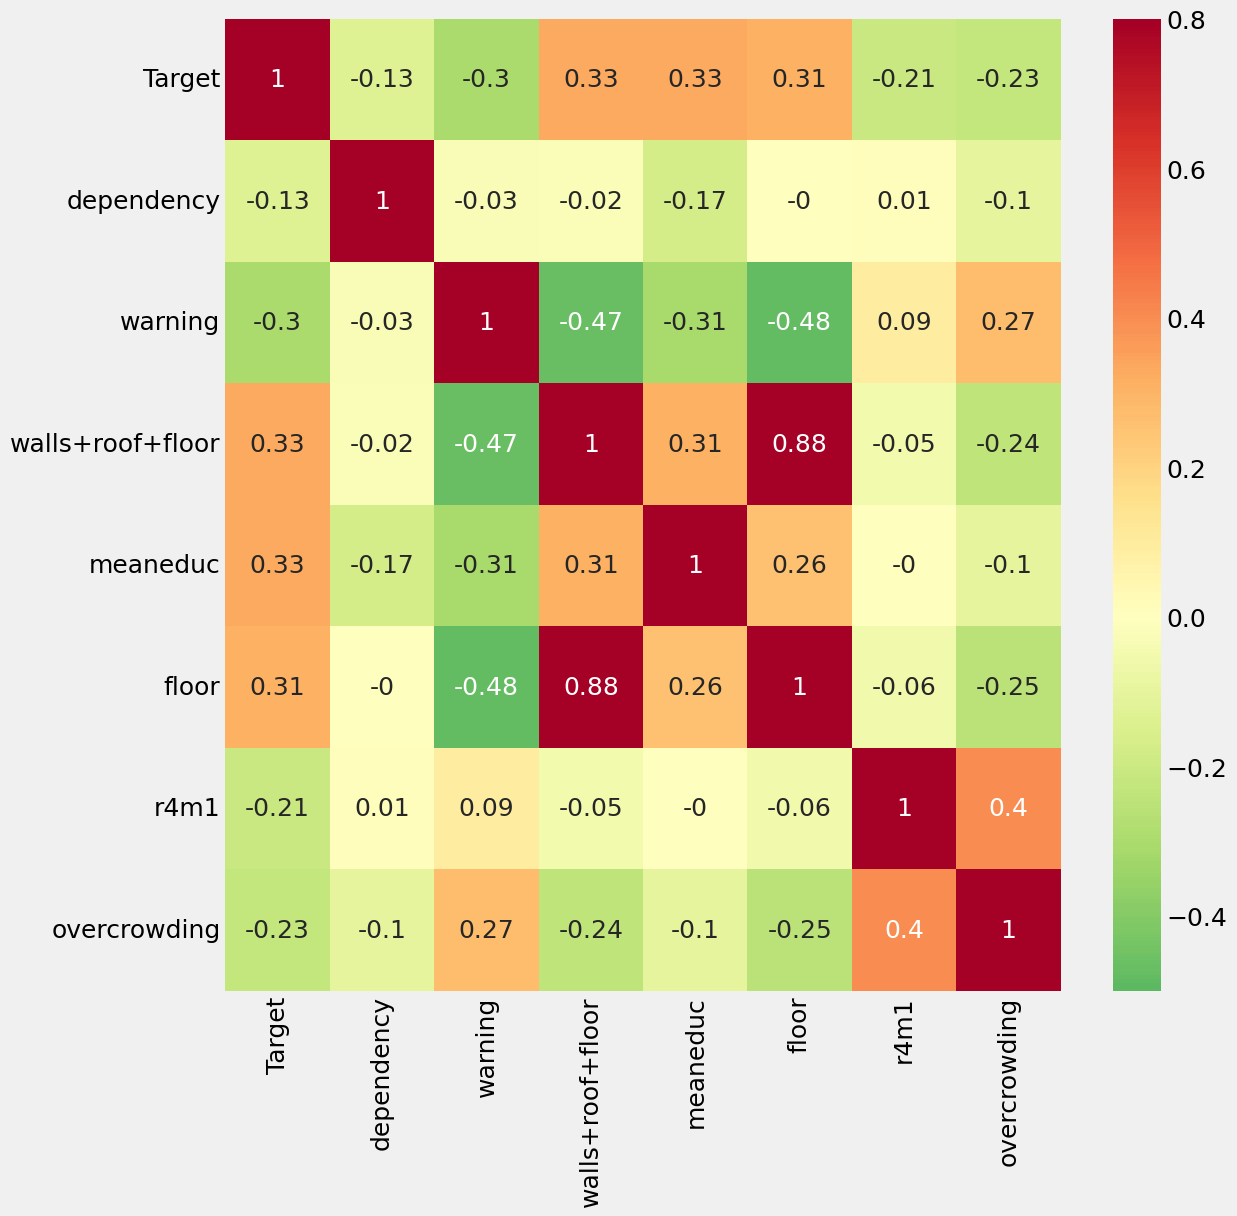

In [ ]:
variables = ['Target', 'dependency', 'warning', 'walls+roof+floor', 'meaneduc',
             'floor', 'r4m1', 'overcrowding']

# Calculate the correlations
corr_mat = train_heads[variables].corr().round(2)

# Draw a correlation heatmap
plt.rcParams['font.size'] = 18
plt.figure(figsize = (12, 12))
sns.heatmap(corr_mat, vmin = -0.5, vmax = 0.8, center = 0,
            cmap = plt.cm.RdYlGn_r, annot = True);


On top of the features selected by author, we also manually added a few features that we think might be important and captures fairness between male and female.

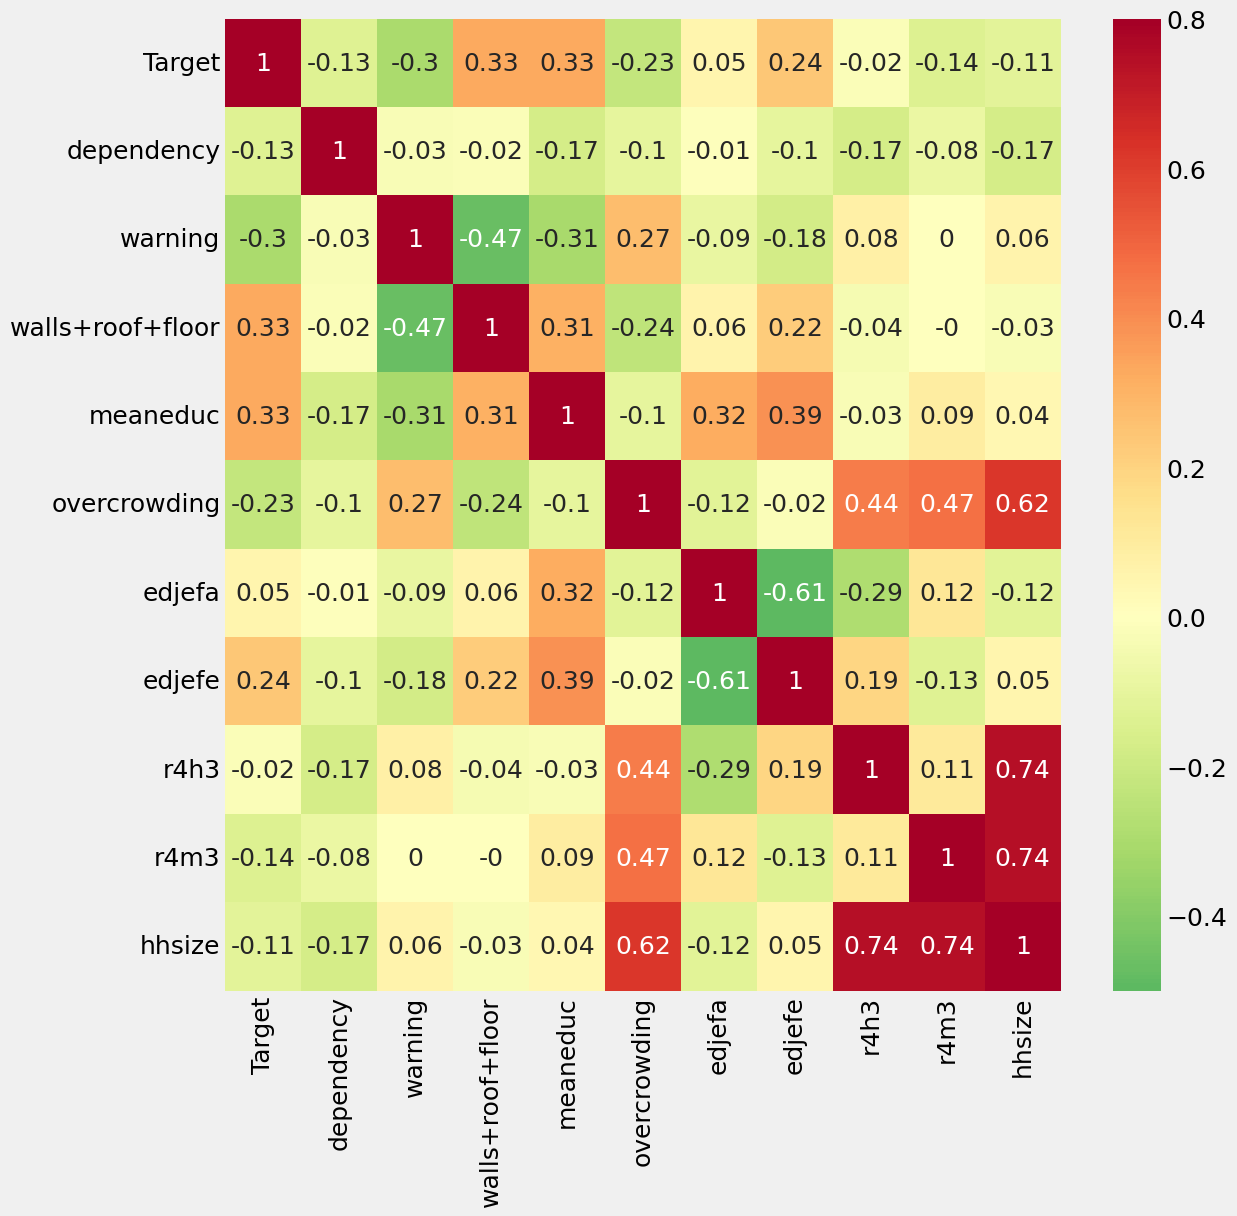

In [ ]:
variables = ['Target', 'dependency', 'warning', 'walls+roof+floor', 'meaneduc',
            'overcrowding', 'edjefa', 'edjefe', 'r4h3', 'r4m3', 'hhsize']

# Calculate the correlations
corr_mat = train_heads[variables].corr().round(2)

# Draw a correlation heatmap
plt.rcParams['font.size'] = 18
plt.figure(figsize = (12, 12))
sns.heatmap(corr_mat, vmin = -0.5, vmax = 0.8, center = 0,
            cmap = plt.cm.RdYlGn_r, annot = True);

In [ ]:
household_feats = list(heads.columns)

# Gender feature exploration

One important finding is that after going back to the individual level data and find the gender for the head of household, the author finds out that **households where the head if female are slightly more likely to have a severe level of poverty.**\
The author also looks at the difference in average education by whether or not the family has a female head of household, and discovers that **households with female heads have higher levels of education.** This contradicts with the previous finding that higher education level is associated with lower poverty level, and we will look more in detail on the relationships between gender, education, and poverty level in our analysis later.

In [ ]:
head_gender = ind.loc[ind['parentesco1'] == 1, ['idhogar', 'female']]
final = final.merge(head_gender, on = 'idhogar', how = 'left').rename(columns = {'female': 'female-head'})
final.groupby('female-head')['Target'].value_counts(normalize=True)

female-head  Target
0            4.0       0.682873
             2.0       0.136464
             3.0       0.123204
             1.0       0.057459
1            4.0       0.617369
             2.0       0.167670
             3.0       0.113500
             1.0       0.101462
Name: proportion, dtype: float64

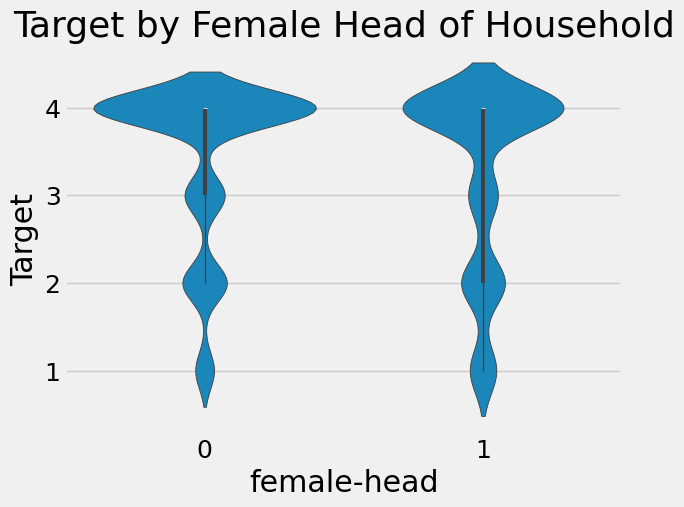

In [ ]:
sns.violinplot(x = 'female-head', y = 'Target', data = final);
plt.title('Target by Female Head of Household');

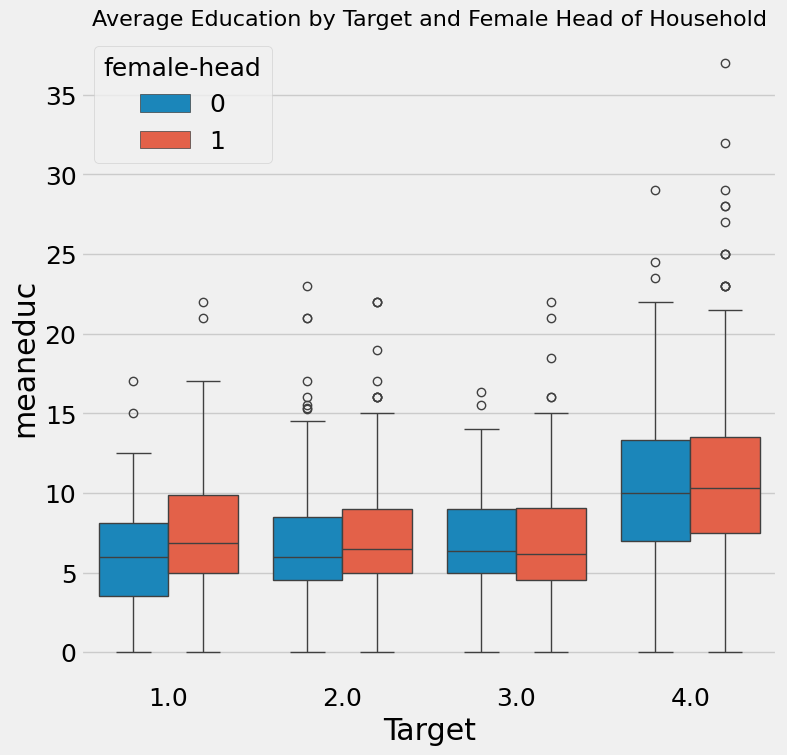

In [ ]:
plt.figure(figsize = (8, 8))
sns.boxplot(x = 'Target', y = 'meaneduc', hue = 'female-head', data = final);
plt.title('Average Education by Target and Female Head of Household', size = 16);

In [ ]:
final.groupby('female-head')['meaneduc'].agg(['mean', 'count'])


mean  count
female-head                 
0            8.968025   6384
1            9.237013   3903

In [ ]:
female_heads = train[(train['parentesco1'] == 1) & (train['female'] == 1)]
value_counts = female_heads['Target'].value_counts()

value_counts

Target
4    718
2    195
3    132
1    118
Name: count, dtype: int64

In [ ]:
male_heads = train[(train['parentesco1'] == 1) & (train['male'] == 1)]
value_counts_male = male_heads['Target'].value_counts()

value_counts_male

Target
4    1236
2     247
3     223
1     104
Name: count, dtype: int64

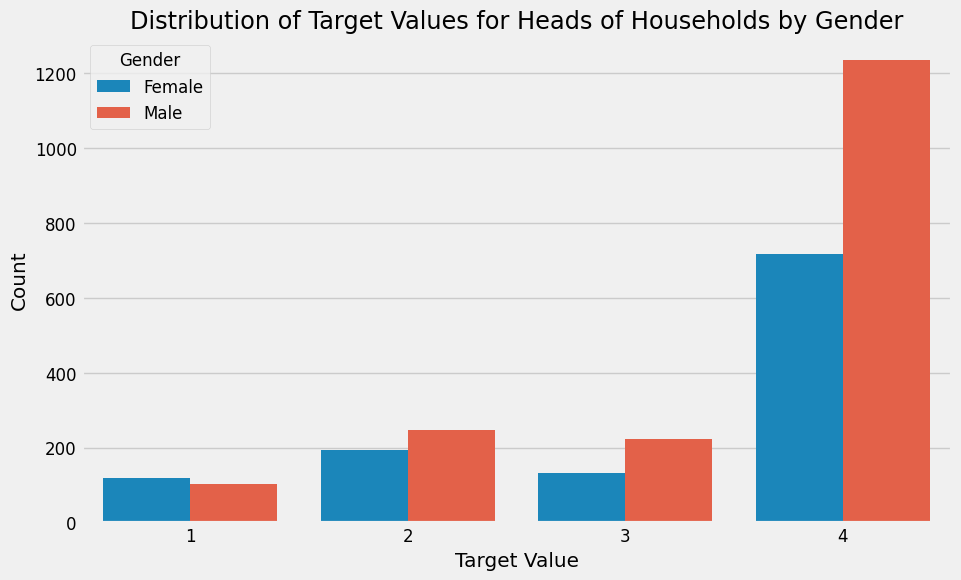

In [ ]:
data = {
    'Target': [1, 2, 3, 4],
    'Female': [118, 195, 132, 718],
    'Male': [104, 247, 223, 1236]
}

df = pd.DataFrame(data)
df_melted = df.melt(id_vars='Target', var_name='Gender', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='Target', y='Count', hue='Gender', data=df_melted)
plt.title('Distribution of Target Values for Heads of Households by Gender')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# Machine Learning Modeling: Random Forest Classifier

The author uses Random Forest Classifier as the baseline model, using cross validation to evaluate the model performance. Then he creates a custom scorer for cross validation, and use F1 Macro as the metric to evaluate the performance.\
The final F1 score for the baseline model is approximately 0.35, which is relatively low. However, looking at the competition itself, we can see that all models perform around 0.3-0.5 F1 scores.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Custom scorer for cross validation
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

In [ ]:
# Labels for training
train_labels = np.array(list(final[final['Target'].notnull()]['Target'].astype(np.uint8)))

# Extract the training data
train_set = final[final['Target'].notnull()].drop(columns = ['Id', 'idhogar', 'Target'])
test_set = final[final['Target'].isnull()].drop(columns = ['Id', 'idhogar', 'Target'])

# Submission base which is used for making submissions to the competition
submission_base = test[['Id', 'idhogar']].copy()


# scaling the features to compare with different models
features = list(train_set.columns)

pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median')),
                      ('scaler', MinMaxScaler())])

# Fit and transform training data
train_set = pipeline.fit_transform(train_set)
test_set = pipeline.transform(test_set)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=10,
                               n_jobs = -1)
# 10 fold cross validation
cv_score = cross_val_score(model, train_set, train_labels, cv = 10, scoring = scorer)

print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

10 Fold Cross Validation F1 Score = 0.3439 with std = 0.0438


In [ ]:
model.fit(train_set, train_labels)

# Feature importances into a dataframe
feature_importances = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importances.head()

feature  importance
0       hacdor    0.000643
1       hacapo    0.000283
2         v14a    0.000460
3       refrig    0.001798
4  paredblolad    0.006024

In [ ]:
# Dataframe to hold results
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results=None):
    """Perform 10 fold cross validation of a model"""
    scorer = 'f1_macro'  # Ensure you define your scorer
    cv_scores = cross_val_score(model, train, train_labels, cv=10, scoring=scorer, n_jobs=-1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')

    if model_results is not None:
        new_row = pd.DataFrame({'model': [name],
                                'cv_mean': [cv_scores.mean()],
                                'cv_std': [cv_scores.std()]})
        model_results = pd.concat([model_results, new_row], ignore_index=True)

    return model_results


In [ ]:
# Author's self-defined feature importance plot
def plot_feature_importances(df, n = 10, threshold = None):
    """Plots n most important features. Also plots the cumulative importance if
    threshold is specified and prints the number of features needed to reach threshold cumulative importance.
    Intended for use with any tree-based feature importances.

    Args:
        df (dataframe): Dataframe of feature importances. Columns must be "feature" and "importance".

        n (int): Number of most important features to plot. Default is 15.

        threshold (float): Threshold for cumulative importance plot. If not provided, no plot is made. Default is None.

    Returns:
        df (dataframe): Dataframe ordered by feature importances with a normalized column (sums to 1)
                        and a cumulative importance column

    Note:

        * Normalization in this case means sums to 1.
        * Cumulative importance is calculated by summing features from most to least important
        * A threshold of 0.9 will show the most important features needed to reach 90% of cumulative importance

    """
    plt.style.use('fivethirtyeight')

    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)

    # Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    plt.rcParams['font.size'] = 12

    # Bar plot of n most important features
    df.loc[:n, :].plot.barh(y = 'importance_normalized',
                            x = 'feature', color = 'darkgreen',
                            edgecolor = 'k', figsize = (12, 8),
                            legend = False, linewidth = 2)

    plt.xlabel('Normalized Importance', size = 18); plt.ylabel('');
    plt.title(f'{n} Most Important Features', size = 18)
    plt.gca().invert_yaxis()


    if threshold:
        # Cumulative importance plot
        plt.figure(figsize = (8, 6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('Number of Features', size = 16); plt.ylabel('Cumulative Importance', size = 16);
        plt.title('Cumulative Feature Importance', size = 18);

        # Number of features needed for threshold cumulative importance
        # This is the index (will need to add 1 for the actual number)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))

        # Add vertical line to plot
        plt.vlines(importance_index + 1, ymin = 0, ymax = 1.05, linestyles = '--', colors = 'red')
        plt.show();

        print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index + 1,
                                                                                  100 * threshold))

    return df


In [ ]:
def kde_target(df, variable):
    """Plots the distribution of `variable` in `df` colored by the `Target` column"""

    colors = {1: 'red', 2: 'orange', 3: 'blue', 4: 'green'}

    plt.figure(figsize = (12, 8))

    df = df[df['Target'].notnull()]

    for level in df['Target'].unique():
        subset = df[df['Target'] == level].copy()
        sns.kdeplot(subset[variable].dropna(),
                    label = f'Poverty Level: {level}',
                    color = colors[int(subset['Target'].unique())])

    plt.xlabel(variable); plt.ylabel('Density');
    plt.title('{} Distribution'.format(variable.capitalize()));

In [ ]:
test_ids = list(final.loc[final['Target'].isnull(), 'idhogar'])

In [ ]:
def submit(model, train, train_labels, test, test_ids):
    """Train and test a model on the dataset"""

    # Train on the data
    model.fit(train, train_labels)
    predictions = model.predict(test)
    predictions = pd.DataFrame({'idhogar': test_ids,
                               'Target': predictions})

     # Make a submission dataframe
    submission = submission_base.merge(predictions,
                                       on = 'idhogar',
                                       how = 'left').drop(columns = ['idhogar'])

    # Fill in households missing a head
    submission['Target'] = submission['Target'].fillna(4).astype(np.int8)

    return submission

rf_submission = submit(RandomForestClassifier(n_estimators = 100,
                                              random_state=10, n_jobs = -1),
                         train_set, train_labels, test_set, test_ids)

# Feature selection, using feature elimination with scikit-learn


We have encountered issues while trying to reproduce the original outcome without specifying the package version. Therefore we retrieved the original selected features to reproduce the original results as much as possible.


In [ ]:
# Reference: Custom scorer for cross validation (already defined earlier)
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

In [ ]:
train_set = pd.DataFrame(train_set, columns=features)

# Create correlation matrix
corr_matrix = train_set.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

print(to_drop)

['coopele', 'elec', 'v18q-count', 'female-sum']


In [ ]:
train_set = train_set.drop(columns = to_drop)
train_set.shape

(2973, 222)

In [ ]:
test_set = pd.DataFrame(test_set, columns = features)
train_set, test_set = train_set.align(test_set, axis = 1, join = 'inner')
features = list(train_set.columns)

In [ ]:
test_set.shape

(7334, 222)

## Important: We have retrieved the selected features from the original solution. We will transform the training dataset according to this selected features, and compare the performances between two different selected features.

Codes used:

```
selected_features_mask = selector.support_
feature_names = train_set.columns.tolist()
selected_features = [feature for bool, feature in zip(selected_features_mask, feature_names) if bool]

print("Selected features:", selected_features)

```



In [ ]:
# retrieved from original notebook, using the above command
selected_features = [
    'paredblolad', 'cielorazo', 'lugar1', 'v2a1', 'dependency', 'edjefe',
    'edjefa', 'meaneduc', 'overcrowding', 'rooms', 'r4h2', 'r4h3', 'r4m3',
    'r4t1', 'hogar_nin', 'bedrooms', 'qmobilephone', 'walls', 'roof', 'floor',
    'walls+roof+floor', 'warning', 'bonus', 'phones-per-capita', 'rooms-per-capita',
    'rent-per-capita', 'female-std', 'estadocivil7-sum', 'estadocivil7-std',
    'parentesco2-std', 'parentesco3-sum', 'instlevel2-sum', 'instlevel2-std',
    'instlevel3-std', 'instlevel4-std', 'instlevel8-sum', 'escolari-min', 'escolari-max',
    'escolari-sum', 'escolari-std', 'escolari-range_', 'age-min', 'age-max', 'age-sum',
    'age-std', 'age-range_', 'inst-max', 'inst-std', 'inst-range_', 'escolari/age-min',
    'escolari/age-max', 'escolari/age-sum', 'escolari/age-std', 'escolari/age-range_',
    'inst/age-max', 'inst/age-std', 'inst/age-range_', 'tech-sum'
]

train_selected = train_set[selected_features]
test_selected  = test_set[selected_features]

# convert back to dataframe
train_selected = pd.DataFrame(train_selected, columns=selected_features)
test_selected = pd.DataFrame(test_selected, columns=selected_features)

In [ ]:
train_selected.columns

Index(['paredblolad', 'cielorazo', 'lugar1', 'v2a1', 'dependency', 'edjefe',
       'edjefa', 'meaneduc', 'overcrowding', 'rooms', 'r4h2', 'r4h3', 'r4m3',
       'r4t1', 'hogar_nin', 'bedrooms', 'qmobilephone', 'walls', 'roof',
       'floor', 'walls+roof+floor', 'warning', 'bonus', 'phones-per-capita',
       'rooms-per-capita', 'rent-per-capita', 'female-std', 'estadocivil7-sum',
       'estadocivil7-std', 'parentesco2-std', 'parentesco3-sum',
       'instlevel2-sum', 'instlevel2-std', 'instlevel3-std', 'instlevel4-std',
       'instlevel8-sum', 'escolari-min', 'escolari-max', 'escolari-sum',
       'escolari-std', 'escolari-range_', 'age-min', 'age-max', 'age-sum',
       'age-std', 'age-range_', 'inst-max', 'inst-std', 'inst-range_',
       'escolari/age-min', 'escolari/age-max', 'escolari/age-sum',
       'escolari/age-std', 'escolari/age-range_', 'inst/age-max',
       'inst/age-std', 'inst/age-range_', 'tech-sum'],
      dtype='object')

In [ ]:
test_selected.columns

Index(['paredblolad', 'cielorazo', 'lugar1', 'v2a1', 'dependency', 'edjefe',
       'edjefa', 'meaneduc', 'overcrowding', 'rooms', 'r4h2', 'r4h3', 'r4m3',
       'r4t1', 'hogar_nin', 'bedrooms', 'qmobilephone', 'walls', 'roof',
       'floor', 'walls+roof+floor', 'warning', 'bonus', 'phones-per-capita',
       'rooms-per-capita', 'rent-per-capita', 'female-std', 'estadocivil7-sum',
       'estadocivil7-std', 'parentesco2-std', 'parentesco3-sum',
       'instlevel2-sum', 'instlevel2-std', 'instlevel3-std', 'instlevel4-std',
       'instlevel8-sum', 'escolari-min', 'escolari-max', 'escolari-sum',
       'escolari-std', 'escolari-range_', 'age-min', 'age-max', 'age-sum',
       'age-std', 'age-range_', 'inst-max', 'inst-std', 'inst-range_',
       'escolari/age-min', 'escolari/age-max', 'escolari/age-sum',
       'escolari/age-std', 'escolari/age-range_', 'inst/age-max',
       'inst/age-std', 'inst/age-range_', 'tech-sum'],
      dtype='object')

In [ ]:
#@title Our feature selection atempt (hidden)

# from sklearn.feature_selection import RFECV

# # Create a model for feature selection
# estimator = RandomForestClassifier(
#     bootstrap=True,
#     class_weight=None,
#     criterion='gini',
#     max_depth=None,
#     max_features='auto',
#     max_leaf_nodes=None,
#     min_impurity_decrease=0.0,
#     min_samples_leaf=1,
#     min_samples_split=2,
#     min_weight_fraction_leaf=0.0,
#     n_estimators=100,
#     n_jobs=-1,
#     oob_score=False,
#     random_state=10,
#     verbose=0,
#     warm_start=False
# )

# # Create the object
# selector = RFECV(
#     estimator=estimator,
#     step=1,
#     cv=3,
#     scoring=scorer,
#     min_features_to_select=1,
#     n_jobs=-1)

# selector.fit(train_set, train_labels)

# print(selector)




# # Plotting the cross-validation scores (mean score across folds)
# plt.figure(figsize=(10, 6))
# mean_score = selector.cv_results_['mean_test_score']
# plt.plot(range(1, len(mean_score) + 1), mean_score, marker='o')
# plt.xlabel('Number of Features')
# plt.ylabel('Macro F1 Score')
# plt.title('Feature Selection Scores')

# # Show the number of features selected by RFECV
# print("Number of features selected:", selector.n_features_)

# plt.show()


# selected_features_mask = selector.support_
# feature_names = train_set.columns.tolist()
# selected_features = [feature for bool, feature in zip(selected_features_mask, feature_names) if bool]

# print("Selected features:", selected_features)

In [ ]:
# @title
# %%capture
# train_selected = selector.transform(train_set)
# test_selected = selector.transform(test_set)
# # Convert back to dataframe
# selected_features = train_set.columns[np.where(selector.ranking_==1)]
# train_selected = pd.DataFrame(train_selected, columns = selected_features)
# test_selected = pd.DataFrame(test_selected, columns = selected_features)

# Random Forest Classifier with Selected Features

In [ ]:
# original selected features from kaggle
cv_score = cross_val_score(model, train_selected, train_labels, cv = 10, scoring = scorer)
print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

10 Fold Cross Validation F1 Score = 0.3632 with std = 0.0387


In [ ]:
model.fit(train_selected, train_labels)

# Feature importances into a dataframe
feature_importances = pd.DataFrame({'feature': selected_features, 'importance': model.feature_importances_})
feature_importances.head()

feature  importance
0  paredblolad    0.010307
1    cielorazo    0.007534
2       lugar1    0.008106
3         v2a1    0.009916
4   dependency    0.024416

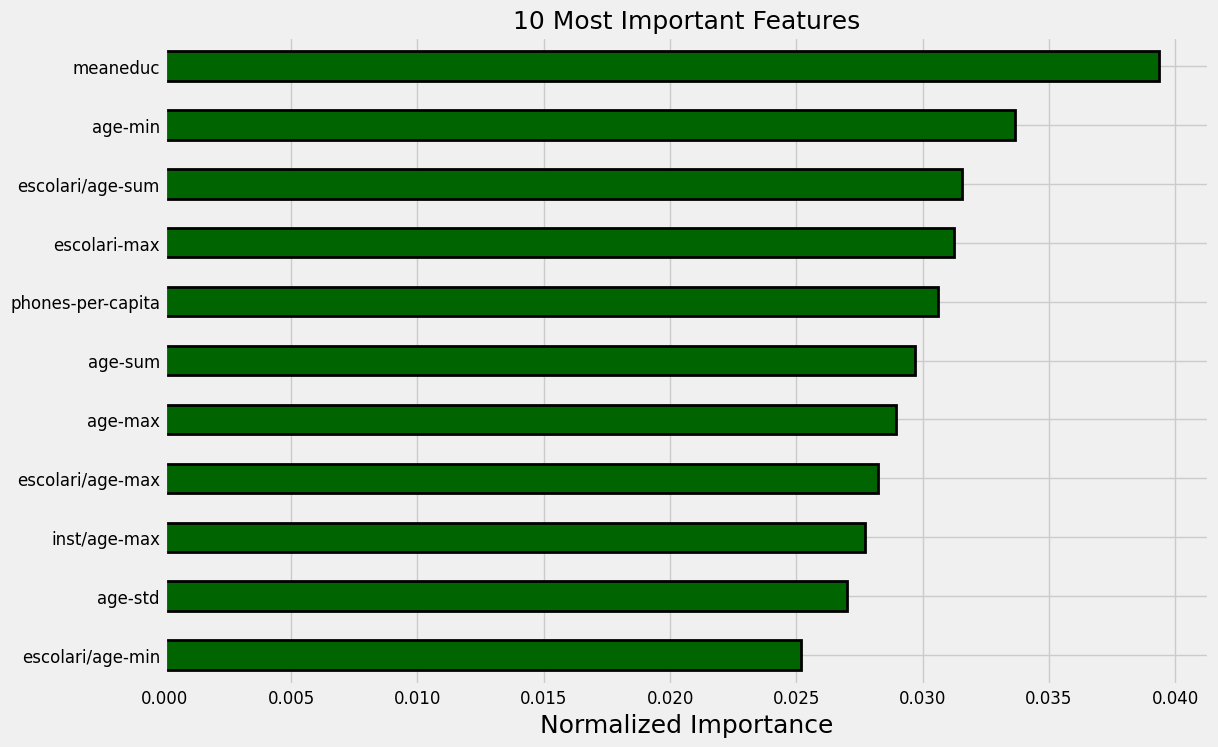

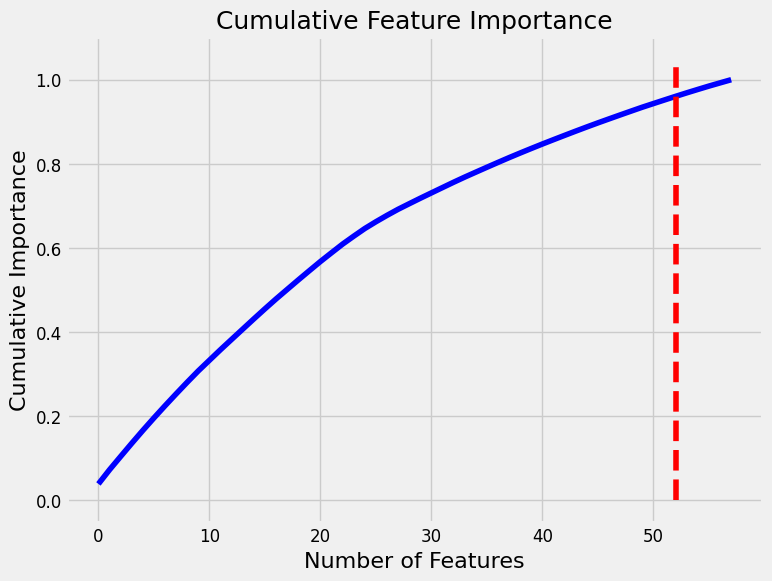

52 features required for 95% of cumulative importance.


In [ ]:
norm_fi = plot_feature_importances(feature_importances, threshold=0.95)

10 Fold CV Score: 0.36316 with std: 0.03873


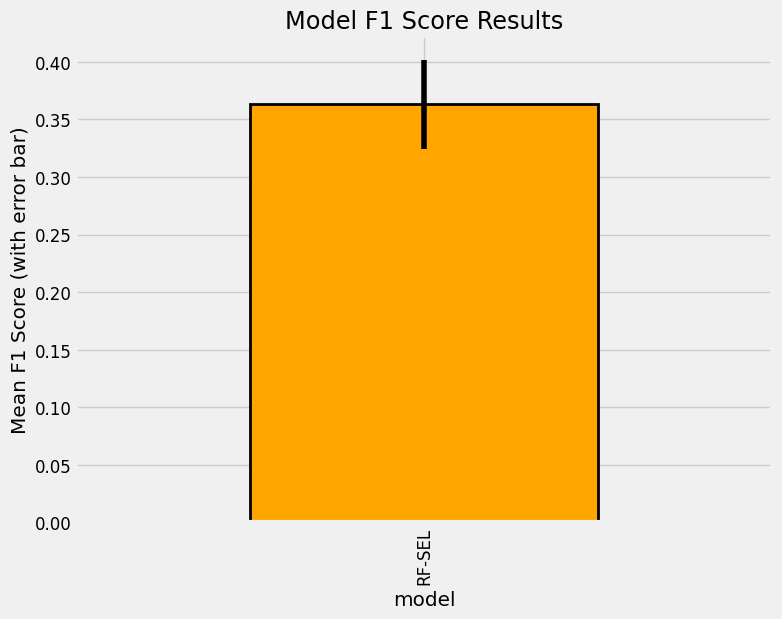

In [ ]:
model_results = cv_model(train_selected, train_labels, model, 'RF-SEL', model_results)

model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                 edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

<ipython-input-66-8c0757e60b1e>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  color = colors[int(subset['Target'].unique())])
<ipython-input-66-8c0757e60b1e>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  color = colors[int(subset['Target'].unique())])
<ipython-input-66-8c0757e60b1e>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  color = colors[int(subset['Target'].unique())])
<ipython-input-66-8c0757e60b1e>:14: DeprecationWarning: Conversion of an array 

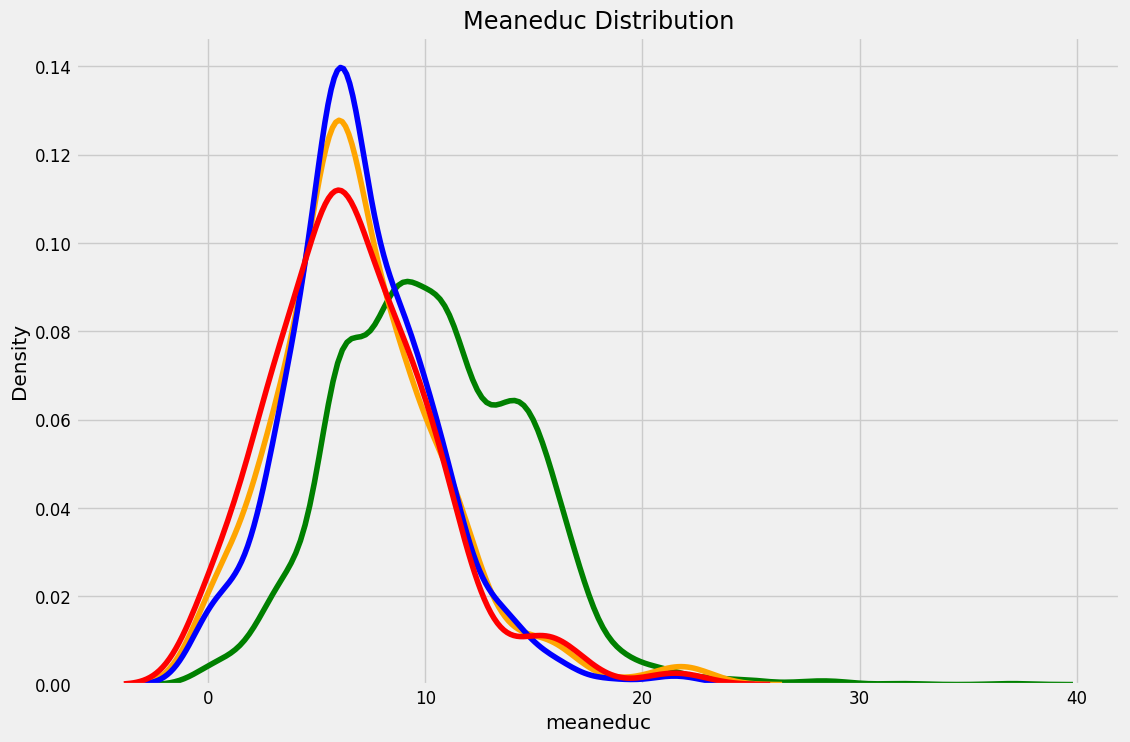

In [ ]:
kde_target(final, 'meaneduc')

# Gradient Boosting Machine: 10 fold CV with Optimal Hyperparameter

Aside from Random Forest Classifier, the author also applies light GBM with stratified Kfold cross validation and early stopping. The hyperparameters were determined from the author's previous works.

"To choose the number of estimators (the number of decision trees in the ensemble, called n_estimators or num_boost_rounds), we'll use early stopping with 5-fold cross validation. This will keep adding estimators until the performance as measured by the Macro F1 Score has not increased for 100 training rounds. To use this metric, we'll have to define a custom metric." (from original notebook)

In [ ]:
#@title LightGBM with our selected features (hidden)

# predictions_selected, gbm_fi_selected = model_gbm(train_selected, train_labels, test_selected, test_ids, return_preds = True)

# _ = plot_feature_importances(gbm_fi_selected)

#Light GBM using original selected features

We have encountered some problems while trying to recreate the original lightGBM model due to version differences (the original kaggle notebook uses a deprecated version of lightGBM, which lead to a lot of the codes not running properly).

There were some issues such as one of the hyperparameters not supporting early stopping in the latest lightGBM model (in original notebook, 'boosting_type' is set as 'dart', but currently this method does not support early stopping.) We changed 'dart' to 'gbdt' to implement the early stopping correctly. Although we weren't able to fully reproduce the original model performance and results, we have investiagated the differences between 2 models and they resemble most of the similarities including feature importances and macro F1 scores, therefore we will be using this modified version of the lightGBM model instead.

Although our model weren't able to score 'meaneduc' as one of the top important features after fitting the mdoel, both the original and our models put importances on age-related variables.

Since the original kaggle competition puts an emphasis on the accuracy and overall performance of the model, after multiple trials (including trying out the best hyperparameters determined by the author), we have concluded that the below model has the best performance overall in terms of the macro F1 score (metric used by the original competition).

One of the purposes of our analysis is to compare how fairness and accuracy for different subgroups differ when the priority is put on differently: Random Forest for a more reasonable feature importance rankings, and lightGBM for an emphasis on the overall accuracy.

In [ ]:
def macro_f1_score(labels, predictions):    # Y_TRUE, Y_PRED
    predictions = np.argmax(predictions, axis=1)
    metric_value = f1_score(labels, predictions, average='macro')
    return 'macro_f1', metric_value, True

In [ ]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from lightgbm.callback import early_stopping
from IPython.display import display

def model_gbm(features, labels, test_features, test_ids,
              nfolds = 10, return_preds = False, hyp = None):
    """Model using the GBM and cross validation.
       Trains with early stopping on each fold.
       Hyperparameters probably need to be tuned."""

    feature_names = list(features.columns)

    if hyp is not None:
        # Using early stopping so do not need number of esimators
        if 'n_estimators' in hyp:
            del hyp['n_estimators']
        params = hyp

    else:
        # Model hyperparameters
        params = {'boosting_type': 'gbdt',
                  'colsample_bytree': 0.88,
                  'learning_rate': 0.028,
                   'min_child_samples': 10,
                   'num_leaves': 36, 'reg_alpha': 0.76,
                   'reg_lambda': 0.43,
                   'subsample_for_bin': 40000,
                   'subsample': 0.54,
                   'class_weight': 'balanced'}


    # Build the model
    model = lgb.LGBMClassifier(**params,
                               objective = 'multiclass',
                               metric="custom",
                               n_jobs = -1,
                               n_estimators = 10000, # optimal determined; dart does not support early_stopping
                               random_state = 10)

    # Using stratified kfold cross validation
    strkfold = StratifiedKFold(n_splits = nfolds, shuffle = True)

    # Hold all the predictions from each fold
    predictions = pd.DataFrame()
    importances = np.zeros(len(feature_names))

    # Convert to arrays for indexing
    features = np.array(features)
    test_features = np.array(test_features)
    labels = np.array(labels).reshape((-1 ))

    valid_scores = []

    # Iterate through the folds
    for i, (train_indices, valid_indices) in enumerate(strkfold.split(features, labels)):

        # Dataframe for fold predictions
        fold_predictions = pd.DataFrame()

        X_train, X_valid = features[train_indices], features[valid_indices]
        y_train, y_valid = labels[train_indices], labels[valid_indices]

        # Train with early stopping
        model.fit(features[train_indices], labels[train_indices],
              eval_set= [(X_train, y_train), (X_valid, y_valid)],
              eval_names=['train', 'valid'],
              eval_metric=macro_f1_score,
              callbacks=[lgb.early_stopping(100),lgb.log_evaluation(200)])
        #lgb.early_stopping(100)

        valid_scores.append((model.best_score_['valid']['macro_f1']))


        # Make predictions from the fold as probabilities
        fold_probabilitites = model.predict_proba(test_features)

        # Record each prediction for each class as a separate column
        for j in range(4):
            fold_predictions[(j + 1)] = fold_probabilitites[:, j]

        # Add needed information for predictions
        fold_predictions['idhogar'] = test_ids
        fold_predictions['fold'] = (i+1)

        # Add the predictions as new rows to the existing predictions
        predictions = pd.concat([predictions, fold_predictions], ignore_index=True)

        # Feature importances
        importances += model.feature_importances_ / nfolds

        # Display fold information
        display(f'Fold {i + 1}, Validation Score: {round(valid_scores[i], 5)}, Estimators Trained: {model.best_iteration_}')

    # Feature importances dataframe
    feature_importances = pd.DataFrame({'feature': feature_names,
                                        'importance': importances})

    valid_scores = np.array(valid_scores)
    display(f'{nfolds} cross validation score: {round(valid_scores.mean(), 5)} with std: {round(valid_scores.std(), 5)}.')

    # If we want to examine predictions don't average over folds
    if return_preds:
        predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis = 1)
        predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis = 1)
        return predictions, feature_importances

    # Average the predictions over folds
    predictions = predictions.groupby('idhogar', as_index = False).mean()

    # Find the class and associated probability
    predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis = 1)
    predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis = 1)
    predictions = predictions.drop(columns = ['fold'])

    # Merge with the base to have one prediction for each individual
    submission = submission_base.merge(predictions[['idhogar', 'Target']], on = 'idhogar', how = 'left').drop(columns = ['idhogar'])

    # Fill in the individuals that do not have a head of household with 4 since these will not be scored
    submission['Target'] = submission['Target'].fillna(4).astype(np.int8)

    # return the submission and feature importances along with validation scores
    return submission, feature_importances, valid_scores

In [ ]:
%%capture --no-display
predictions_lgbm, gbm_fi  = model_gbm(train_selected, train_labels, test_selected, test_ids, return_preds = True)

'Fold 1, Validation Score: 0.40127, Estimators Trained: 12'

'Fold 2, Validation Score: 0.46591, Estimators Trained: 12'

'Fold 3, Validation Score: 0.45564, Estimators Trained: 117'

'Fold 4, Validation Score: 0.38684, Estimators Trained: 57'

'Fold 5, Validation Score: 0.43005, Estimators Trained: 62'

'Fold 6, Validation Score: 0.42523, Estimators Trained: 13'

'Fold 7, Validation Score: 0.45204, Estimators Trained: 164'

'Fold 8, Validation Score: 0.4093, Estimators Trained: 5'

'Fold 9, Validation Score: 0.41772, Estimators Trained: 27'

'Fold 10, Validation Score: 0.45195, Estimators Trained: 87'

'10 cross validation score: 0.42959 with std: 0.0249.'

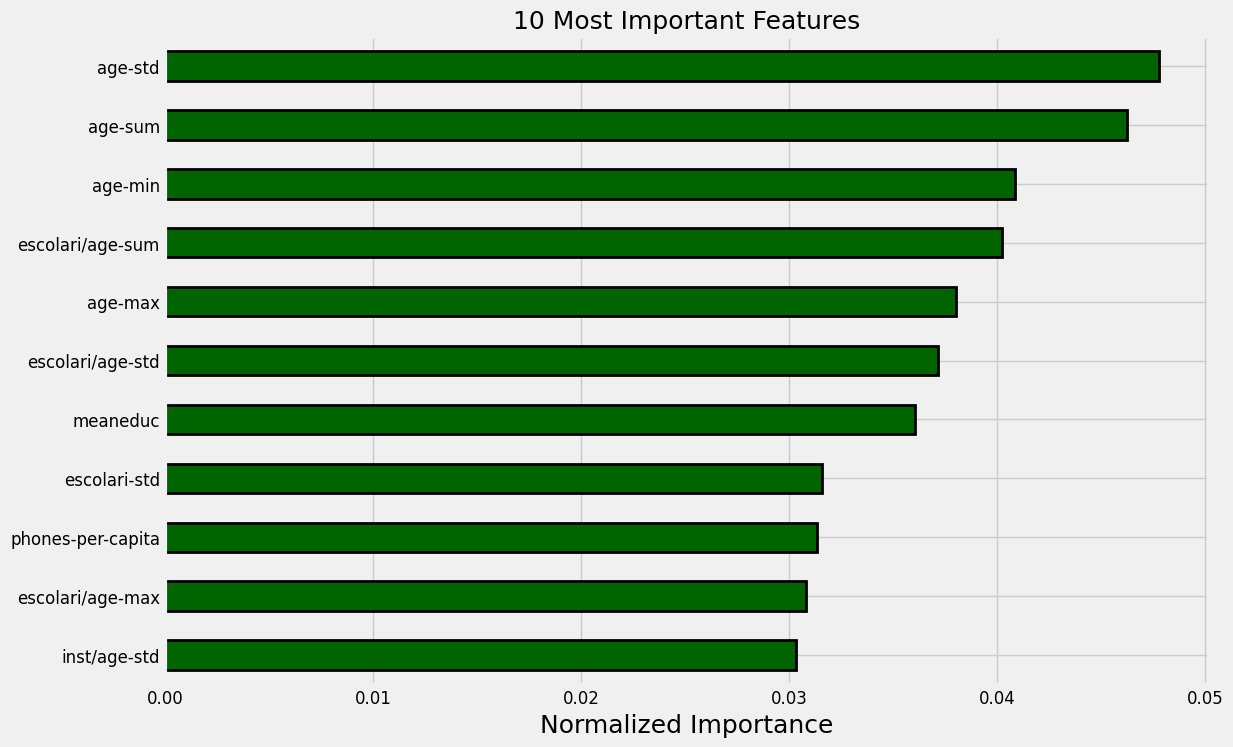

In [ ]:
_ = plot_feature_importances(gbm_fi)

In [ ]:
gbm_fi.sort_values(by = 'importance', ascending = False)

feature  importance
44              age-std       371.9
43              age-sum       359.9
41              age-min       318.0
51     escolari/age-sum       313.1
42              age-max       295.9
52     escolari/age-std       289.2
7              meaneduc       280.7
39         escolari-std       245.7
23    phones-per-capita       243.9
50     escolari/age-max       239.7
55         inst/age-std       236.0
24     rooms-per-capita       218.6
53  escolari/age-range_       214.7
54         inst/age-max       206.3
38         escolari-sum       199.1
4            dependency       196.8
49     escolari/age-min       196.0
45           age-range_       193.1
47             inst-std       189.8
20     walls+roof+floor       172.3
8          overcrowding       167.7
56      inst/age-range_       165.7
9                 rooms       137.2
3                  v2a1       135.5
5                edjefe       135.0
37         escolari-max       133.0
25      rent-per-capita       111.5
22                bonus       110.2
6                edjefa       106.5
34       instlevel4-std        98.5
29      parentesco2-std        87.2
33       instlevel3-std        84.9
57             tech-sum        79.2
36         escolari-min        75.8
26           female-std        74.6
16         qmobilephone        73.7
19                floor        72.5
10                 r4h2        68.9
0           paredblolad        63.7
40      escolari-range_        63.1
12                 r4m3        62.4
18                 roof        60.4
32       instlevel2-std        60.4
28     estadocivil7-std        58.8
17                walls        54.7
31       instlevel2-sum        50.6
11                 r4h3        47.4
27     estadocivil7-sum        44.7
2                lugar1        43.6
15             bedrooms        41.5
46             inst-max        40.2
30      parentesco3-sum        36.6
13                 r4t1        36.2
14            hogar_nin        34.6
1             cielorazo        29.7
21              warning        29.5
48          inst-range_        23.8
35       instlevel8-sum         3.8

# Evaluation and Validation

In [ ]:
from sklearn.model_selection import train_test_split

# Split into validation set
X_train, X_valid, y_train, y_valid = train_test_split(train_selected,
                                                      train_labels,
                                                      test_size = 1000,
                                                      random_state = 10)

## 1. Random Forest with selected features

In [ ]:

test_ids = list(final.loc[final['Target'].isnull(), 'idhogar'])

model.fit(X_train, y_train)
preds_rf = model.predict(X_valid)
preds_rf = pd.DataFrame(preds_rf, columns = ['prediction'])

preds_rf.head()

prediction
0           4
1           4
2           4
3           2
4           3

In [ ]:
print('F1 score:', round(f1_score(y_valid, preds_rf['prediction'], average = 'macro'), 5))

F1 score: 0.36941


## 2. LightGBM

In [ ]:
best_hyp = {'boosting_type': 'gbdt',
                  'colsample_bytree': 0.88,
                  'learning_rate': 0.028,
                   'min_child_samples': 10,
                   'num_leaves': 36, 'reg_alpha': 0.76,
                   'reg_lambda': 0.43,
                   'subsample_for_bin': 40000,
                   'subsample': 0.54}

# Create model and train
model_lgbm = lgb.LGBMClassifier(**best_hyp,
                           class_weight = 'balanced',
                           random_state = 10)
model_lgbm.fit(X_train, y_train);

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3826
[LightGBM] [Info] Number of data points in the train set: 1973, number of used features: 58
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294


In [ ]:
feature_importance_original = model_lgbm.feature_importances_

## Overall Macro F1 score validation

In [ ]:
valid_preds_lgbm = model_lgbm.predict_proba(X_valid)
preds_df = pd.DataFrame(valid_preds_lgbm, columns = [1, 2, 3, 4], index=X_valid.index)

# Convert into predictions
preds_df['prediction'] = preds_df[[1, 2, 3, 4]].idxmax(axis = 1)
preds_df['confidence'] = preds_df[[1, 2, 3, 4]].max(axis = 1)

y_pred = preds_df['prediction']

In [ ]:
print('F1 score:', round(f1_score(y_valid, y_pred, average = 'macro'), 5))

F1 score: 0.42712


## F1 score by subgroups(1): poverty level 1-4

In [ ]:
print('F1 score:', f1_score(y_valid, y_pred, average = None))

F1 score: [0.28220859 0.37333333 0.26277372 0.79018211]


We can see that our model performs the best for predicting the least poor class (poverty level = 4, non vulnerable). This is concerning since the model fails to predict vulnerable households in need of financial assistance or social welfare programs.

In [ ]:
preds_df

1         2         3         4  prediction  confidence
1263  0.064567  0.037541  0.042419  0.855472           4    0.855472
1363  0.017664  0.017648  0.012333  0.952354           4    0.952354
2790  0.040018  0.103441  0.442511  0.414029           3    0.442511
2921  0.204352  0.407518  0.324907  0.063223           2    0.407518
2540  0.038955  0.195207  0.681334  0.084504           3    0.681334
...        ...       ...       ...       ...         ...         ...
2897  0.087529  0.567573  0.239673  0.105225           2    0.567573
646   0.098265  0.229626  0.550754  0.121355           3    0.550754
2435  0.311029  0.566385  0.083437  0.039149           2    0.566385
1156  0.038300  0.332827  0.098976  0.529897           4    0.529897
344   0.112420  0.402866  0.247895  0.236819           2    0.402866

[1000 rows x 6 columns]

In [ ]:
lgbm_new = X_valid.copy()
lgbm_new['predicted poverty'] = y_pred
lgbm_new

paredblolad  cielorazo  lugar1      v2a1  dependency    edjefe  \
1263          0.0        1.0     1.0  0.025494    0.000000  0.428571   
1363          1.0        1.0     1.0  0.000000    0.000000  0.000000   
2790          1.0        1.0     0.0  0.000000    0.125000  0.523810   
2921          0.0        0.0     0.0  0.000000    0.062500  0.095238   
2540          1.0        0.0     0.0  0.000000    1.000000  0.000000   
...           ...        ...     ...       ...         ...       ...   
2897          0.0        0.0     0.0  0.000000    0.125000  0.190476   
646           0.0        1.0     1.0  0.033992    0.125000  0.333333   
2435          0.0        0.0     0.0  0.000000    0.250000  0.000000   
1156          1.0        1.0     1.0  0.050988    0.083333  0.000000   
344           0.0        1.0     1.0  0.050988    0.125000  0.000000   

        edjefa  meaneduc  overcrowding  rooms   r4h2   r4h3   r4m3      r4t1  \
1263  0.000000  0.270270      0.137931    0.3  0.125  0.125  0.125  0.000000   
1363  0.714286  0.396396      0.094828    0.7  0.250  0.250  0.125  0.000000   
2790  0.000000  0.283784      0.195402    0.4  0.125  0.250  0.250  0.142857   
2921  0.000000  0.054054      0.224138    0.3  0.125  0.125  0.250  0.000000   
2540  0.047619  0.027027      0.051724    0.3  0.000  0.000  0.125  0.000000   
...        ...       ...           ...    ...    ...    ...    ...       ...   
2897  0.000000  0.121622      0.482759    0.3  0.500  0.500  0.250  0.000000   
646   0.000000  0.175676      0.310345    0.3  0.125  0.125  0.375  0.142857   
2435  0.095238  0.067568      0.224138    0.3  0.000  0.000  0.375  0.000000   
1156  0.619048  0.315315      0.181034    0.6  0.125  0.250  0.375  0.285714   
344   0.285714  0.162162      0.137931    0.2  0.000  0.000  0.250  0.000000   

      hogar_nin  bedrooms  qmobilephone  walls  roof  floor  walls+roof+floor  \
1263   0.000000  0.142857           0.2    1.0   0.5    1.0          0.833333   
1363   0.000000  0.428571           0.3    1.0   1.0    1.0          1.000000   
2790   0.222222  0.285714           0.4    1.0   1.0    1.0          1.000000   
2921   0.111111  0.142857           0.3    0.5   0.5    0.5          0.500000   
2540   0.000000  0.142857           0.1    1.0   1.0    1.0          1.000000   
...         ...       ...           ...    ...   ...    ...               ...   
2897   0.222222  0.142857           0.3    1.0   1.0    1.0          1.000000   
646    0.222222  0.142857           0.3    0.5   0.5    0.0          0.333333   
2435   0.111111  0.142857           0.2    0.0   0.0    0.0          0.000000   
1156   0.222222  0.428571           0.3    1.0   0.5    1.0          0.833333   
344    0.111111  0.142857           0.1    0.5   0.5    0.5          0.500000   

      warning  bonus  phones-per-capita  rooms-per-capita  rent-per-capita  \
1263     0.00   0.25           0.333333          0.207547            0.030   
1363     0.00   0.75           0.333333          0.283019            0.000   
2790     0.00   0.25           0.333333          0.122642            0.000   
2921     0.25   0.25           0.333333          0.132075            0.000   
2540     0.25   0.25           0.333333          0.433962            0.000   
...       ...    ...                ...               ...              ...   
2897     0.25   0.00           0.166667          0.056604            0.000   
646      0.00   0.25           0.250000          0.094340            0.020   
2435     0.25   0.25           0.222222          0.132075            0.000   
1156     0.00   0.50           0.200000          0.139623            0.024   
344      0.00   0.25           0.166667          0.150943            0.060   

      female-std  estadocivil7-sum  estadocivil7-std  parentesco2-std  \
1263    1.000000               0.0          0.000000         1.000000   
1363    0.816497               0.2          0.816497         0.000000   
2790    0.816497               0.2          0.81649

## F1 score by subgroups(2): male vs female

We created a new variable called household head = sex into the predicted dataframe, according to variables "edjefe" and "edjefa" (years of education for male / female). For instance if edjefe = 0, then the household head will be female.

In [ ]:
lgbm_new[['edjefe', 'edjefa']]

edjefe    edjefa
1263  0.428571  0.000000
1363  0.000000  0.714286
2790  0.523810  0.000000
2921  0.095238  0.000000
2540  0.000000  0.047619
...        ...       ...
2897  0.190476  0.000000
646   0.333333  0.000000
2435  0.000000  0.095238
1156  0.000000  0.619048
344   0.000000  0.285714

[1000 rows x 2 columns]

In [ ]:
# create a new column called hh_sex" (househoold head = sex, 0 for female and 1 for male)
lgbm_new['hh_sex'] = np.where(lgbm_new['edjefe'] == 0, 0, np.where(lgbm_new['edjefa'] == 0, 1, np.nan))
lgbm_new

paredblolad  cielorazo  lugar1      v2a1  dependency    edjefe  \
1263          0.0        1.0     1.0  0.025494    0.000000  0.428571   
1363          1.0        1.0     1.0  0.000000    0.000000  0.000000   
2790          1.0        1.0     0.0  0.000000    0.125000  0.523810   
2921          0.0        0.0     0.0  0.000000    0.062500  0.095238   
2540          1.0        0.0     0.0  0.000000    1.000000  0.000000   
...           ...        ...     ...       ...         ...       ...   
2897          0.0        0.0     0.0  0.000000    0.125000  0.190476   
646           0.0        1.0     1.0  0.033992    0.125000  0.333333   
2435          0.0        0.0     0.0  0.000000    0.250000  0.000000   
1156          1.0        1.0     1.0  0.050988    0.083333  0.000000   
344           0.0        1.0     1.0  0.050988    0.125000  0.000000   

        edjefa  meaneduc  overcrowding  rooms   r4h2   r4h3   r4m3      r4t1  \
1263  0.000000  0.270270      0.137931    0.3  0.125  0.125  0.125  0.000000   
1363  0.714286  0.396396      0.094828    0.7  0.250  0.250  0.125  0.000000   
2790  0.000000  0.283784      0.195402    0.4  0.125  0.250  0.250  0.142857   
2921  0.000000  0.054054      0.224138    0.3  0.125  0.125  0.250  0.000000   
2540  0.047619  0.027027      0.051724    0.3  0.000  0.000  0.125  0.000000   
...        ...       ...           ...    ...    ...    ...    ...       ...   
2897  0.000000  0.121622      0.482759    0.3  0.500  0.500  0.250  0.000000   
646   0.000000  0.175676      0.310345    0.3  0.125  0.125  0.375  0.142857   
2435  0.095238  0.067568      0.224138    0.3  0.000  0.000  0.375  0.000000   
1156  0.619048  0.315315      0.181034    0.6  0.125  0.250  0.375  0.285714   
344   0.285714  0.162162      0.137931    0.2  0.000  0.000  0.250  0.000000   

      hogar_nin  bedrooms  qmobilephone  walls  roof  floor  walls+roof+floor  \
1263   0.000000  0.142857           0.2    1.0   0.5    1.0          0.833333   
1363   0.000000  0.428571           0.3    1.0   1.0    1.0          1.000000   
2790   0.222222  0.285714           0.4    1.0   1.0    1.0          1.000000   
2921   0.111111  0.142857           0.3    0.5   0.5    0.5          0.500000   
2540   0.000000  0.142857           0.1    1.0   1.0    1.0          1.000000   
...         ...       ...           ...    ...   ...    ...               ...   
2897   0.222222  0.142857           0.3    1.0   1.0    1.0          1.000000   
646    0.222222  0.142857           0.3    0.5   0.5    0.0          0.333333   
2435   0.111111  0.142857           0.2    0.0   0.0    0.0          0.000000   
1156   0.222222  0.428571           0.3    1.0   0.5    1.0          0.833333   
344    0.111111  0.142857           0.1    0.5   0.5    0.5          0.500000   

      warning  bonus  phones-per-capita  rooms-per-capita  rent-per-capita  \
1263     0.00   0.25           0.333333          0.207547            0.030   
1363     0.00   0.75           0.333333          0.283019            0.000   
2790     0.00   0.25           0.333333          0.122642            0.000   
2921     0.25   0.25           0.333333          0.132075            0.000   
2540     0.25   0.25           0.333333          0.433962            0.000   
...       ...    ...                ...               ...              ...   
2897     0.25   0.00           0.166667          0.056604            0.000   
646      0.00   0.25           0.250000          0.094340            0.020   
2435     0.25   0.25           0.222222          0.132075            0.000   
1156     0.00   0.50           0.200000          0.139623            0.024   
344      0.00   0.25           0.166667          0.150943            0.060   

      female-std  estadocivil7-sum  estadocivil7-std  parentesco2-std  \
1263    1.000000               0.0          0.000000         1.000000   
1363    0.816497               0.2          0.816497         0.000000   
2790    0.816497               0.2          0.81649

In [ ]:
lgbm_new.groupby('hh_sex')['predicted poverty'].value_counts()

hh_sex  predicted poverty
0.0     4                    221
        2                     74
        1                     61
        3                     61
1.0     4                    374
        3                    100
        2                     87
        1                     22
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import f1_score, classification_report

lgbm_new.reset_index(drop=True, inplace=True)


gender0_data = lgbm_new[lgbm_new['hh_sex'] == 0]
gender1_data = lgbm_new[lgbm_new['hh_sex'] == 1]

y_true_female = y_valid[gender0_data.index]
y_pred_female= gender0_data['predicted poverty']

y_true_male = y_valid[gender1_data.index]
y_pred_male = gender1_data['predicted poverty']

print("Classification Report for female:")
print(classification_report(y_true_female, y_pred_female))

print("Classification Report for male:")
print(classification_report(y_true_male, y_pred_male))

# If you want F1 scores per class specifically:
f1_scores_gender0 = f1_score(y_true_female, y_pred_female, average=None)
f1_scores_gender1 = f1_score(y_true_male, y_pred_male, average=None)

print("F1 scores for Gender 0 (per class):", f1_scores_gender0)
print("F1 scores for Gender 1 (per class):", f1_scores_gender1)

Classification Report for female:
              precision    recall  f1-score   support

           1       0.34      0.46      0.39        46
           2       0.32      0.36      0.34        67
           3       0.18      0.23      0.20        48
           4       0.81      0.70      0.75       256

    accuracy                           0.57       417
   macro avg       0.42      0.44      0.42       417
weighted avg       0.61      0.57      0.58       417

Classification Report for male:
              precision    recall  f1-score   support

           1       0.09      0.06      0.07        34
           2       0.37      0.44      0.40        72
           3       0.25      0.38      0.30        65
           4       0.85      0.77      0.81       412

    accuracy                           0.65       583
   macro avg       0.39      0.42      0.40       583
weighted avg       0.68      0.65      0.66       583

F1 scores for Gender 0 (per class): [0.39252336 0.34042553 0.201

## AUC & ROC

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc, roc_curve

roc_auc_score(y_valid, valid_preds_lgbm, average='macro', multi_class="ovr")

0.7547284849962117

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_valid)
y_onehot_test.shape  # (n_samples, n_classes)

(1000, 4)

In [ ]:
# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), valid_preds_lgbm.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")


Micro-averaged One-vs-Rest ROC AUC score:
0.84


In [ ]:
n_classes = len(np.unique(y_valid))


for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], valid_preds_lgbm[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")


Macro-averaged One-vs-Rest ROC AUC score:
0.75


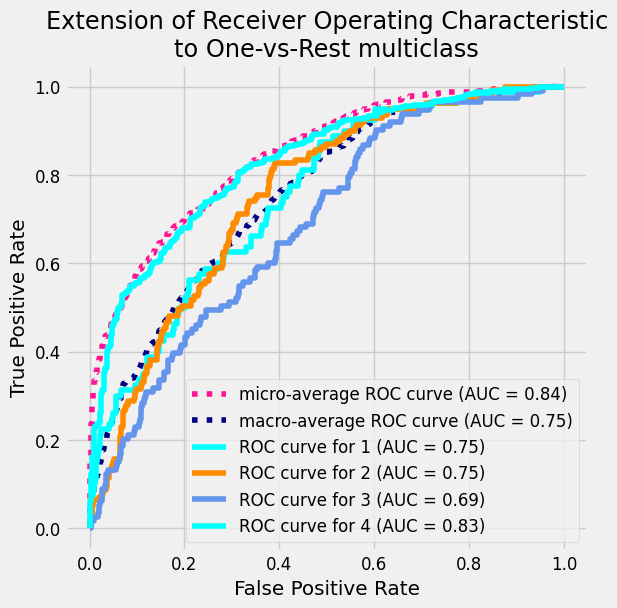

In [ ]:
from itertools import cycle
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(6, 6))

target_names = ['1', '2', '3', '4']

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        valid_preds_lgbm[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

# Fairness

## Demographic parity between female and male


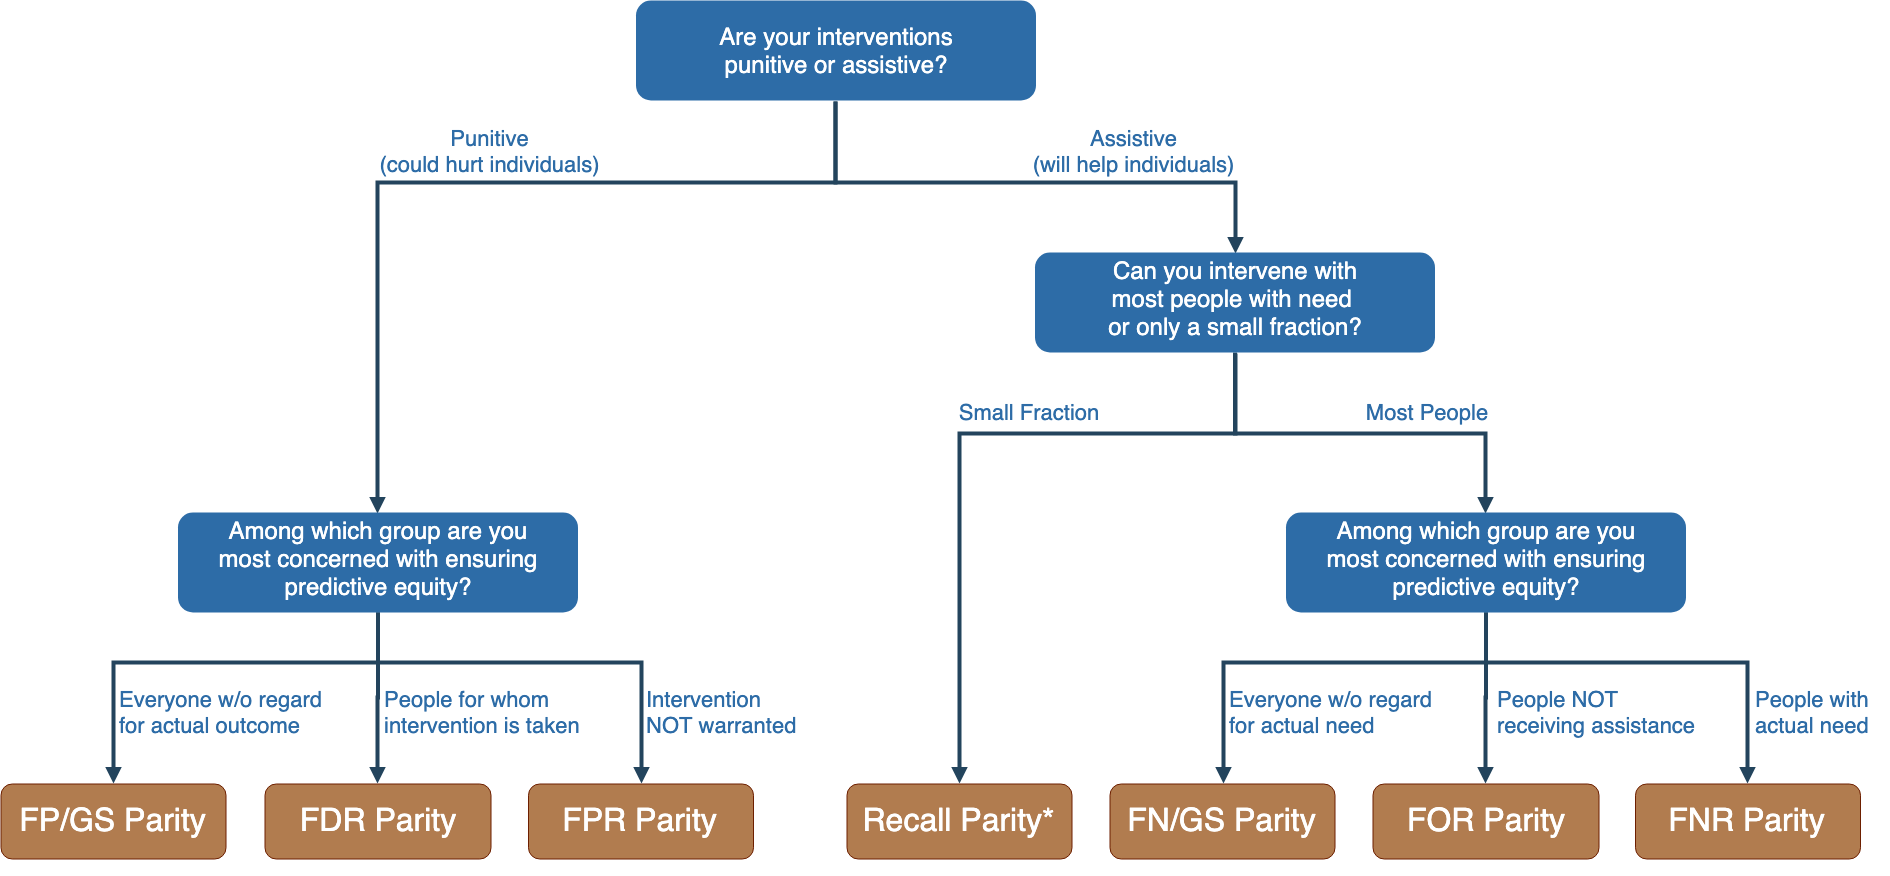

Our intervention is assistive: individuals who are classified as "vulnerable" should be able to receive help from the government. Missing out on people who are in need (classifying vulnerable households as not vulnerable) will harm them.

However, it is likely that the social welfare program cannot satisfy everyone's need. Therefore recall parity will be crucial in analyzing how effective the model is at serving people with need.


Group-level recall may provide a useful metric for thinking about equity, asking the question, “given that the program cannot serve everyone with need, is it at least serving different populations in a manner that reflects their level of need?”

In [ ]:
X_valid['hh_sex'] = np.where(X_valid['edjefe'] == 0, 0, np.where(X_valid['edjefa'] == 0, 1, np.nan))

### Confusion Matrix for predicted vs true labels

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[ 23  23  16  18]
 [ 19  56  27  37]
 [ 14  22  36  41]
 [ 27  60  82 499]]


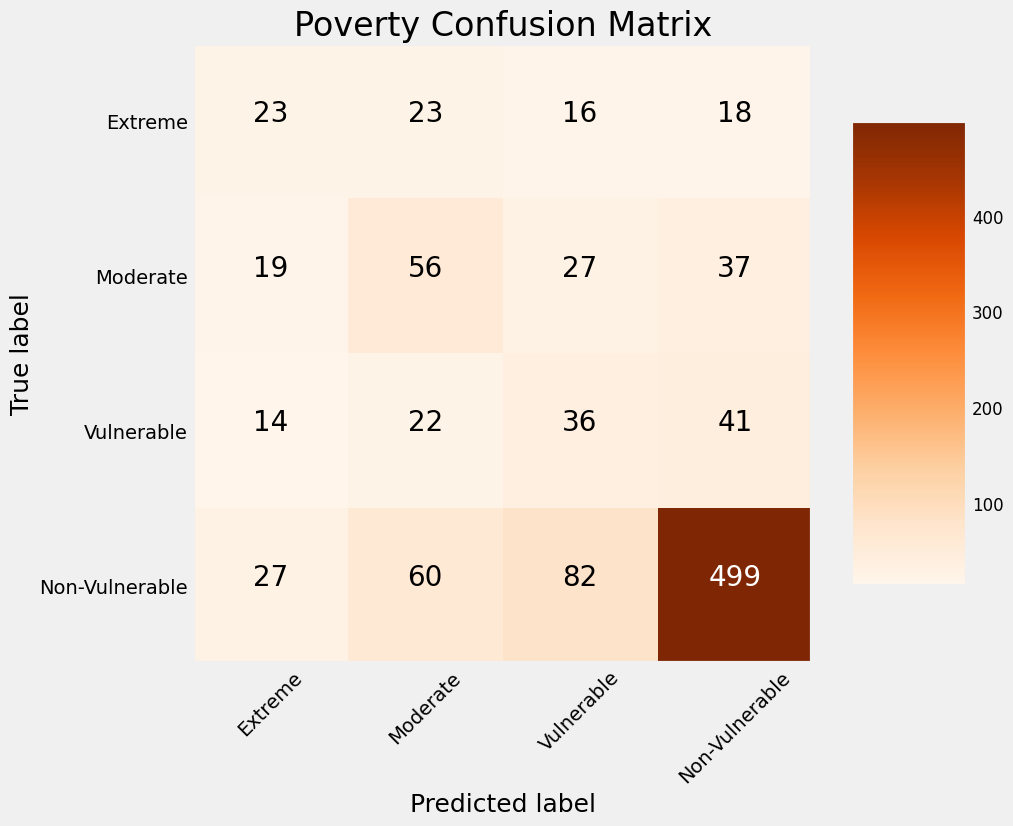

In [ ]:
cm = confusion_matrix(y_valid, preds_df['prediction'])

plot_confusion_matrix(cm, classes = ['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'],
                      title = 'Poverty Confusion Matrix')

Normalized confusion matrix
[[0.2875     0.2875     0.2        0.225     ]
 [0.13669065 0.4028777  0.1942446  0.26618705]
 [0.12389381 0.19469027 0.31858407 0.36283186]
 [0.04041916 0.08982036 0.12275449 0.74700599]]


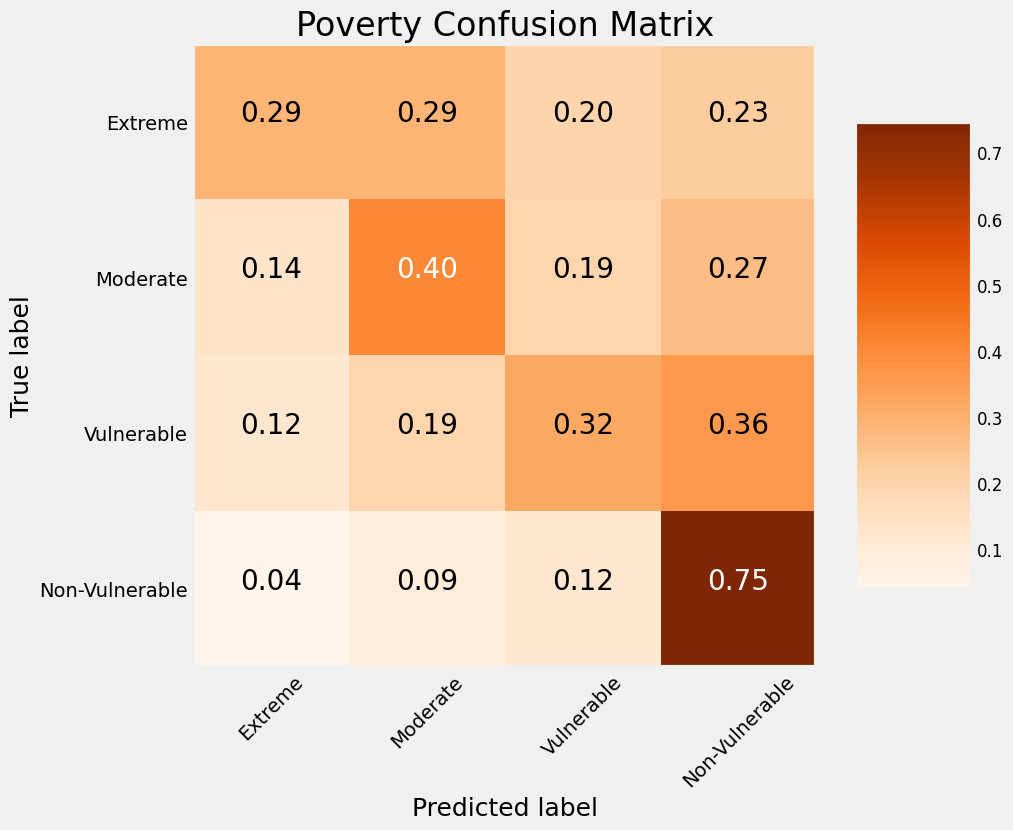

In [ ]:
# Percentage
plot_confusion_matrix(cm, normalize = True,
                      classes = ['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'],
                      title = 'Poverty Confusion Matrix')

Class 1: overall, male, female

In [ ]:
sensitive_features_sex = lgbm_new['hh_sex'].replace({0:'female', 1:'male'})

def confusion_matrices_by_gender(df):
    genders = df['hh_sex'].unique()
    matrices = {}
    for gender in genders:
        subset = df[df['hh_sex'] == gender]
        cm = confusion_matrix(subset['y_true'], subset['y_pred'])
        matrices[gender] = pd.DataFrame(cm,
                                        index=[f"true={i}" for i in range(1, cm.shape[0]+1)],
                                        columns=[f"pred={i}" for i in range(1, cm.shape[1]+1)])
    return matrices
df = pd.DataFrame({
    'hh_sex': lgbm_new['hh_sex'],  # Gender
    'y_true': y_valid,  # Actual labels
    'y_pred': y_pred   # Predicted labels
})

matrices = confusion_matrices_by_gender(df)

for gender, matrix in matrices.items():
    print(f"Confusion Matrix for {gender}:")
    print(matrix)
    print("\n")

Confusion Matrix for 1.0:
        pred=1  pred=2  pred=3  pred=4
true=1       2      11      10      11
true=2       7      32      16      17
true=3       4       9      25      27
true=4       9      35      49     319


Confusion Matrix for 0.0:
        pred=1  pred=2  pred=3  pred=4
true=1      21      12       6       7
true=2      12      24      11      20
true=3      10      13      11      14
true=4      18      25      33     180




In [ ]:
def compute_metrics(cm):
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    # Calculating False Positive Rate, False Negative Rate, Precision, and Recall
    FPR = FP / (FP + TN)
    FNR = FN / (TP + FN)
    Precision = TP / (TP + FP)
    Recall = TP / (TP + FN)

    return Precision, Recall, FPR, FNR

def demographic_parity(df, class_positive=4):
    # Calculate the proportion of positive predictions for each subgroup
    groups = df.groupby('hh_sex')['y_pred'].apply(lambda x: (x == class_positive).mean())
    min_probability = groups.min()
    max_probability = groups.max()

    # Calculate DPR as the ratio of min to max probabilities
    dpr = min_probability / max_probability
    return dpr, groups

def confusion_matrices_by_gender(df):
    genders = df['hh_sex'].unique()
    results = {}
    for gender in genders:
        subset = df[df['hh_sex'] == gender]
        cm = confusion_matrix(subset['y_true'], subset['y_pred'], labels=[1, 2, 3, 4])
        precision, recall, fpr, fnr = compute_metrics(cm)

        results[gender] = {
            'Confusion Matrix': cm,
            'Precision': precision,
            'Recall': recall,
            'FPR': fpr,
            'FNR': fnr
        }

    dpr, group_rates = demographic_parity(df)
    results['Demographic Parity Ratio'] = dpr
    results['Group Rates'] = group_rates

    return results

results = confusion_matrices_by_gender(df)

print("Overall Metrics by Gender:")
for gender, metrics in results.items():
    if gender != 'Demographic Parity Ratio' and gender != 'Group Rates':
        print(f"\nMetrics for Gender {gender}:")
        print("Confusion Matrix:\n", metrics['Confusion Matrix'])
        print("Precision:", metrics['Precision'])
        print("Recall:", metrics['Recall'])
        print("False Positive Rate:", metrics['FPR'])
        print("False Negative Rate:", metrics['FNR'])
    elif gender == 'Group Rates':
        continue
    else:
        print("\nDemographic Parity Ratio:", results['Demographic Parity Ratio'])

print("\nClass 4 Prediction Rate by Gender:")
for gender, rate in results['Group Rates'].items():
    print(f"Gender {gender}: {rate:.4f}")

Overall Metrics by Gender:

Metrics for Gender 1.0:
Confusion Matrix:
 [[  2  11  10  11]
 [  7  32  16  17]
 [  4   9  25  27]
 [  9  35  49 319]]
Precision: [0.09090909 0.36781609 0.25       0.85294118]
Recall: [0.05882353 0.44444444 0.38461538 0.77427184]
False Positive Rate: [0.03642987 0.10763209 0.14478764 0.32163743]
False Negative Rate: [0.94117647 0.55555556 0.61538462 0.22572816]

Metrics for Gender 0.0:
Confusion Matrix:
 [[ 21  12   6   7]
 [ 12  24  11  20]
 [ 10  13  11  14]
 [ 18  25  33 180]]
Precision: [0.3442623  0.32432432 0.18032787 0.81447964]
Recall: [0.45652174 0.35820896 0.22916667 0.703125  ]
False Positive Rate: [0.10781671 0.14285714 0.13550136 0.25465839]
False Negative Rate: [0.54347826 0.64179104 0.77083333 0.296875  ]

Demographic Parity Ratio: 0.8261390887290169

Class 4 Prediction Rate by Gender:
Gender 0.0: 0.5300
Gender 1.0: 0.6415


# Explainability: SHAP values

In [ ]:
!pip install shap==0.43.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.4 MB/s eta 0:00:00


In [ ]:
X_valid = X_valid.drop(['hh_sex'], axis=1)

In [ ]:
model_lgbm.classes_

array([1, 2, 3, 4])

Class 1 SHAP Summary Plot


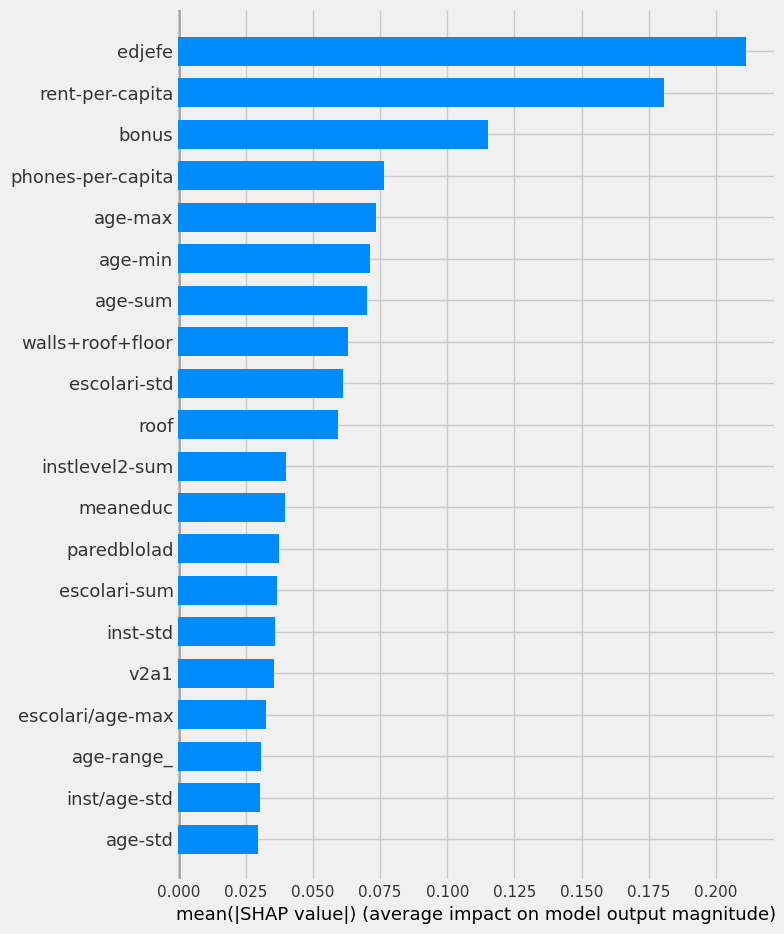

Class 2 SHAP Summary Plot


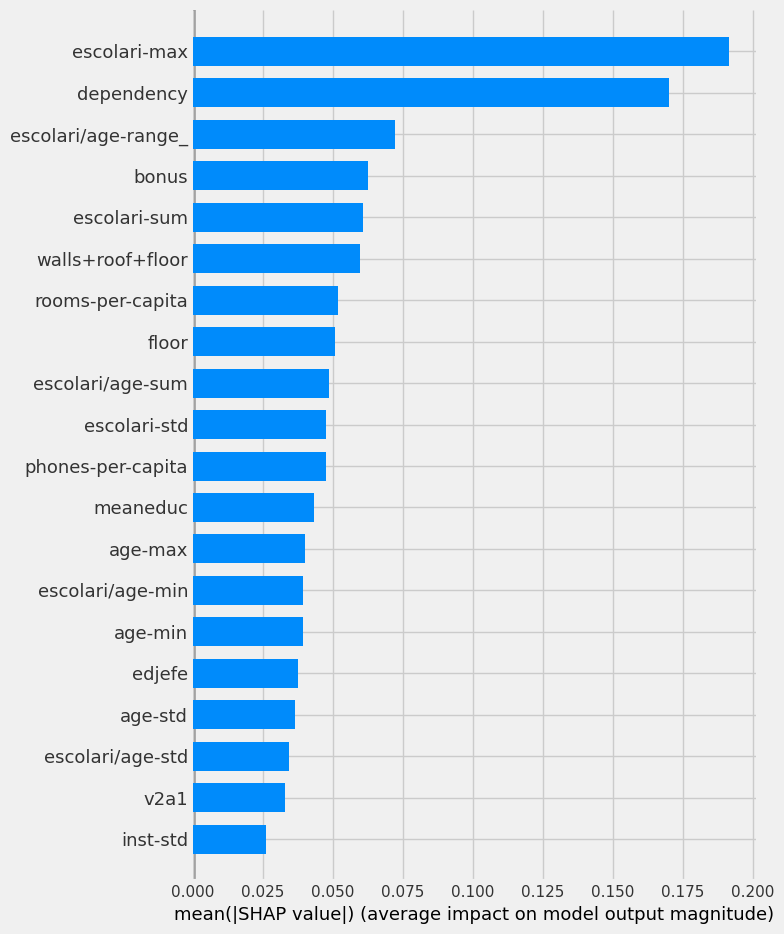

Class 3 SHAP Summary Plot


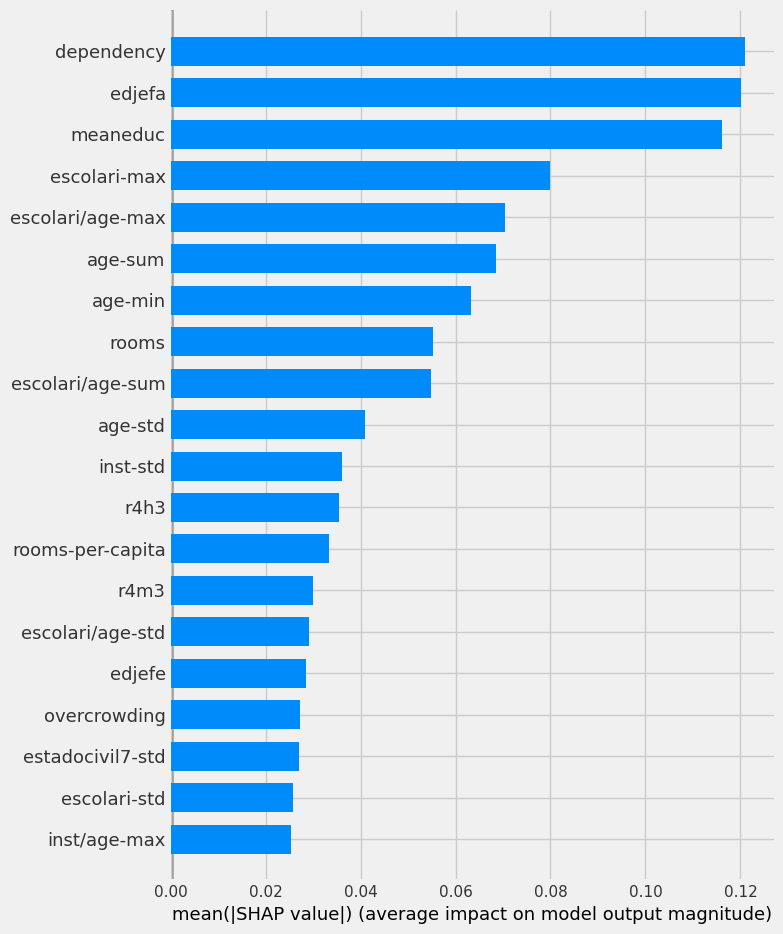

Class 4 SHAP Summary Plot


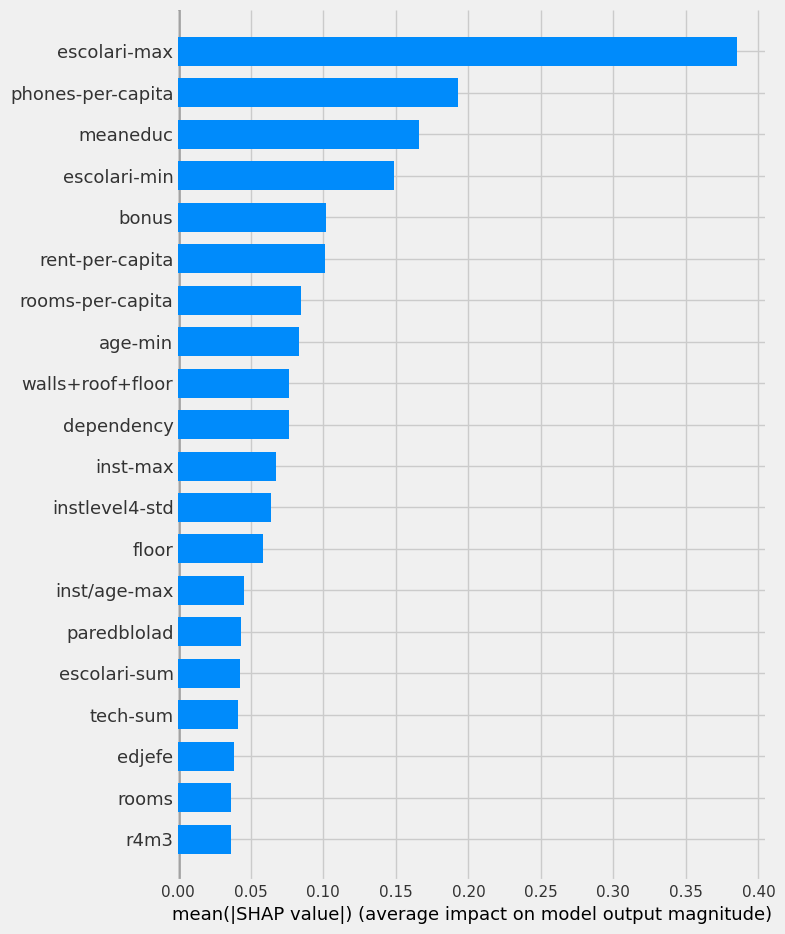

In [ ]:
import shap

explainer = shap.TreeExplainer(model_lgbm)
shap_values = explainer.shap_values(X_valid)

for i in range(4):
    print(f"Class {i+1} SHAP Summary Plot")
    shap.summary_plot(shap_values[i], X_valid, plot_type="bar")


Class 1 SHAP Summary Plot


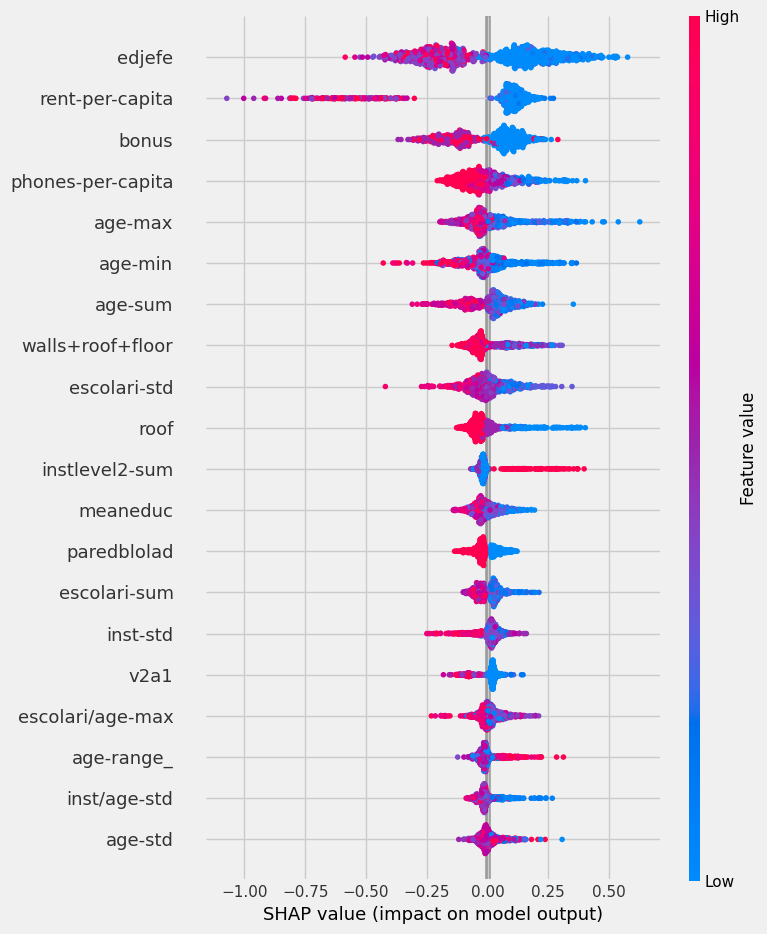

Class 2 SHAP Summary Plot


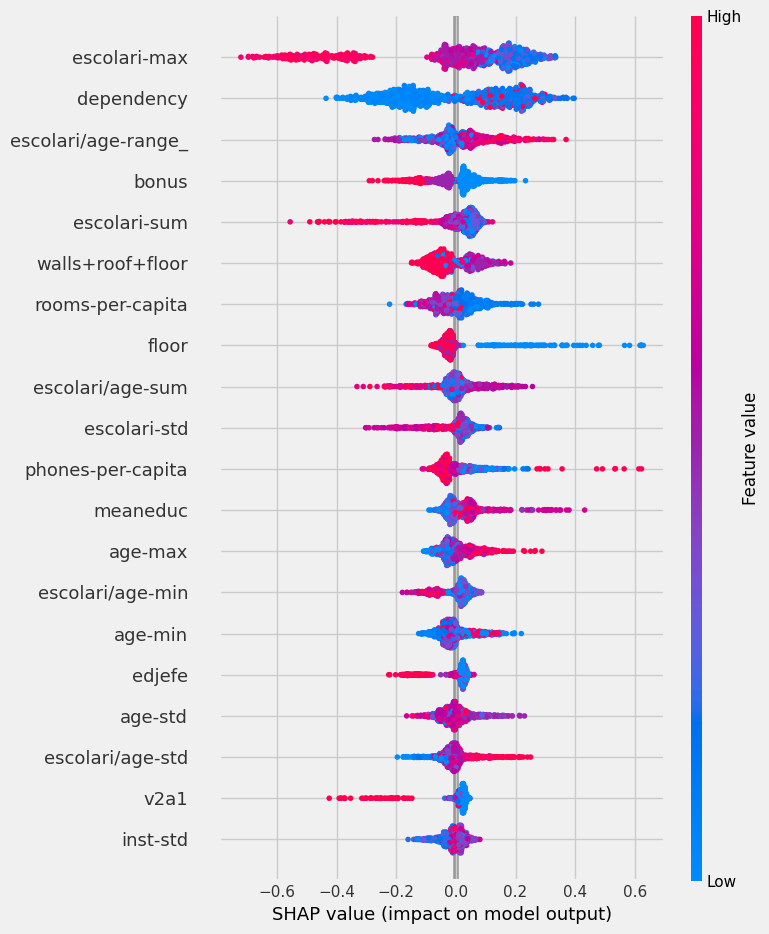

Class 3 SHAP Summary Plot


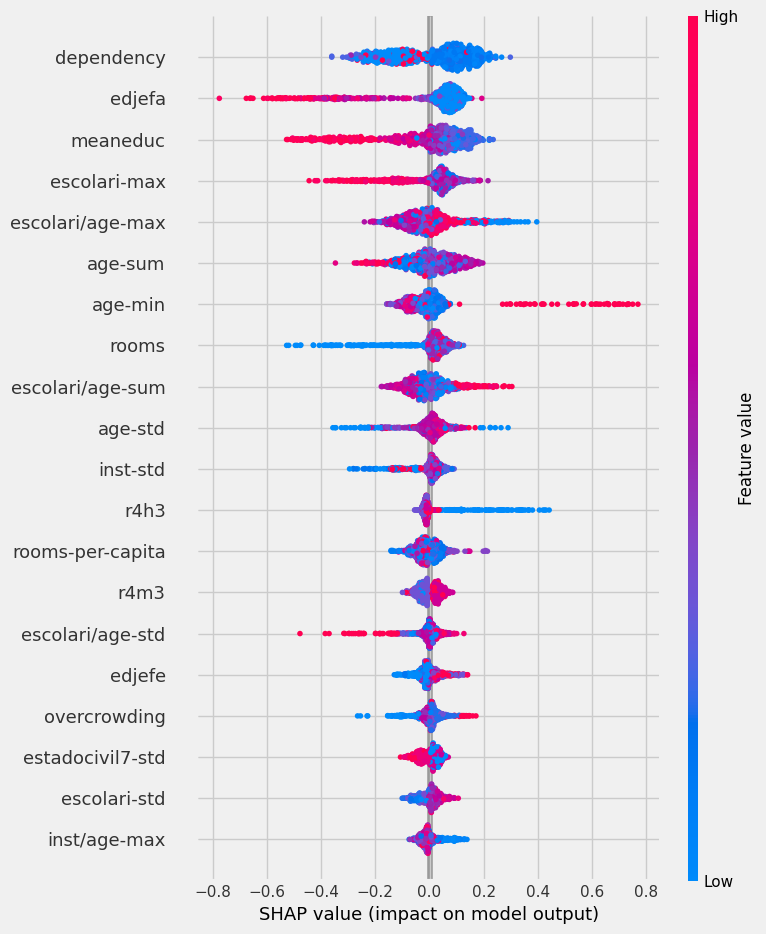

Class 4 SHAP Summary Plot


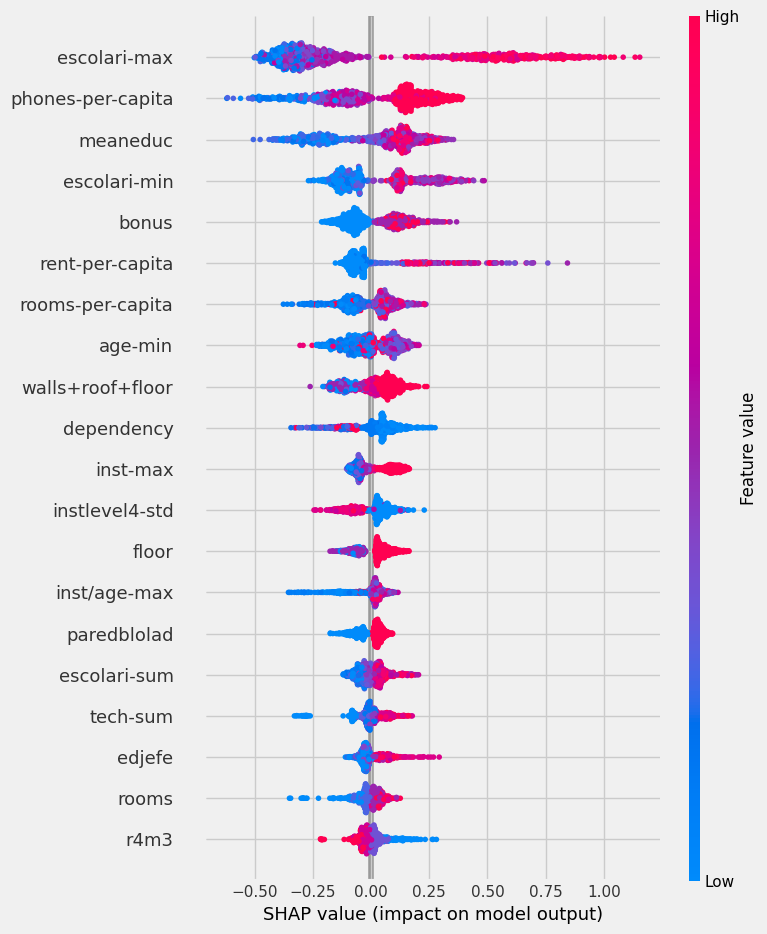

In [ ]:
for i in range(4):
    print(f"Class {i+1} SHAP Summary Plot")
    shap.summary_plot(shap_values[i], X_valid)

In [ ]:
shap.initjs()

id = 0
class_index = 0

shap_values_instance = shap_values[class_index][id]

# Generate the force plot for the selected class and instance
shap.force_plot(
    explainer.expected_value[class_index],
    shap_values_instance,
    X_valid.iloc[id]
)

In [ ]:
shap.initjs()

id = 0
class_index = 1

shap_values_instance = shap_values[class_index][id]

shap.force_plot(
    explainer.expected_value[class_index],
    shap_values_instance,
    X_valid.iloc[id]
)

In [ ]:
shap.initjs()

id = 0
class_index = 2

shap_values_instance = shap_values[class_index][id]

shap.force_plot(
    explainer.expected_value[class_index],
    shap_values_instance,
    X_valid.iloc[id]
)

In [ ]:
shap.initjs()

id = 0
class_index = 3

shap_values_instance = shap_values[class_index][id]

shap.force_plot(
    explainer.expected_value[class_index],
    shap_values_instance,
    X_valid.iloc[id]
)

# Model selection

The author tried 8 other Scikit-Learn models and determined that Random Forest model performed the best. We have excluded the detailed evaluations in our notebook, but the original comparisons can be found in the original notebook.

After hyperparameter tuning and trying differnet models, the author found out that **Light GBM with 10-fold CV with selected features** had the best performance among Light GBM models, and **Random Forest Classifier with selected features** had the best among other models.

For the hyperparameters we chose, the mean CV score reached a macro F1 score of 0.440893029.

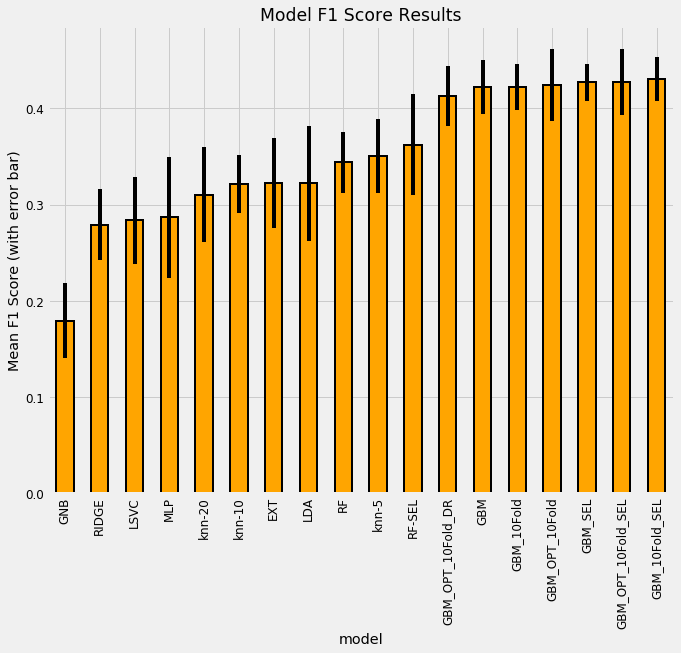



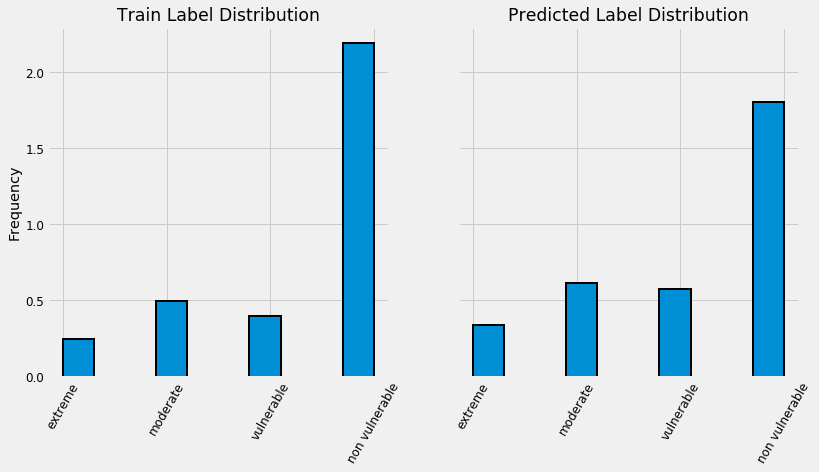